In [35]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import numpy as np

2 Identifying and understanding KPIs.mp4

## Loading & examining our data

Let's begin by loading and examining two datasets: one that contains a set of user demographics and the other -- a set of data relating to in-app purchases for our meditation app.

Instructions
100 XP
Import pandas as pd.
Load the file 'customer_data.csv' as a DataFrame called customer_data.
Load the file 'inapp_purchases.csv' as a DataFrame called app_purchases.
Print the columns of customer_data and then app_purchases using their .columns attribute.

In [9]:
import pandas as pd

# load user's demographic data
customer_data = pd.read_csv('/Users/Andrew/Downloads/(DataCamp) Customer Analytics and A:B Testing in Python/user_demographics_v1.csv')
customer_data.head()


,uid,reg_date,device,gender,country,age
0,54030035.0,2017-06-29T00:00:00Z,and,M,USA,19
1,72574201.0,2018-03-05T00:00:00Z,iOS,F,TUR,22
2,64187558.0,2016-02-07T00:00:00Z,iOS,M,USA,16
3,92513925.0,2017-05-25T00:00:00Z,and,M,BRA,41
4,99231338.0,2017-03-26T00:00:00Z,iOS,M,FRA,59


In [18]:
print(customer_data.nunique())
print(customer_data.shape)
print(customer_data.columns)
print(customer_data.dtypes)
print(type(customer_data['reg_date'][0]))

uid         10000
reg_date     1057
device          2
gender          2
country         6
age            69
dtype: int64
(10000, 6)
Index(['uid', 'reg_date', 'device', 'gender', 'country', 'age'], dtype='object')
uid         float64
reg_date     object
device       object
gender       object
country      object
age           int64
dtype: object
<class 'datetime.date'>


In [10]:
# load user's app purchase data
app_purchases = pd.read_csv('/Users/Andrew/Downloads/(DataCamp) Customer Analytics and A:B Testing in Python/purchase_data_v1.csv')
app_purchases.head()

,date,uid,sku,price
0,2017-07-10,41195147,sku_three_499,499
1,2017-07-15,41195147,sku_three_499,499
2,2017-11-12,41195147,sku_four_599,599
3,2017-09-26,91591874,sku_two_299,299
4,2017-12-01,91591874,sku_four_599,599


In [21]:
print(app_purchases.nunique())
print(app_purchases.shape)
print(app_purchases.columns)
print(app_purchases.dtypes)
print(type(app_purchases['date'][0]))

date      998
uid      1322
sku         8
price       6
dtype: int64
(9006, 4)
Index(['date', 'uid', 'sku', 'price'], dtype='object')
date     object
uid       int64
sku      object
price     int64
dtype: object
<class 'datetime.date'>


## Merging on different sets of fields

As you saw in the previous exercise, both customer_data and app_purchases have a common 'uid' column that you can use to combine them. If you explored them further, you would discover that they also have a common date column that is named 'date' in app_purchases and 'reg_date' in customer_data.

In this exercise you will explore merging on both of these columns and looking at how this impacts your final results.

The two datasets from the previous exercise - customer_data and app_purchases- have been loaded for you, with 'reg_date' in customer_data renamed to 'date'.

In [8]:
# if we need to rename
#customer_data.rename(columns = {'reg_date': 'date'}, inplace = True)

In [22]:
customer_data['reg_date'] = pd.to_datetime(customer_data['reg_date']).dt.date
app_purchases['date'] = pd.to_datetime(app_purchases['date']).dt.date
print(customer_data.dtypes)
print(customer_data['reg_date'].dtype)
print(customer_data['reg_date'][0])
print(type(customer_data['reg_date'][0]))


uid         float64
reg_date     object
device       object
gender       object
country      object
age           int64
dtype: object
object
2017-06-29
<class 'datetime.date'>


Merge customer_data with app_purchases, combining on the 'uid' column.

In [25]:
# merging
uid_combined_data = app_purchases.merge(customer_data, on=['uid'], how='inner')
# add month column
uid_combined_data['date_month'] = uid_combined_data['date'] - pd.offsets.MonthBegin(1)

print(len(uid_combined_data))
uid_combined_data.head()

9006


,date,uid,sku,price,reg_date,device,gender,country,age,date_month
0,2017-07-10,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,2017-07-01
1,2017-07-15,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,2017-07-01
2,2017-11-12,41195147,sku_four_599,599,2017-06-26,and,M,BRA,17,2017-11-01
3,2017-09-26,91591874,sku_two_299,299,2017-01-05,and,M,TUR,17,2017-09-01
4,2017-12-01,91591874,sku_four_599,599,2017-01-05,and,M,TUR,17,2017-11-01


To look at purchases that happened on the date of registration, merge customer_data to app_purchases on 'uid' and 'date'.

In [12]:
uid_date_combined_data = app_purchases.merge(customer_data, left_on =['uid', 'date'], right_on =['uid', 'reg_date'], how='inner')

print(len(uid_date_combined_data))
print(uid_date_combined_data.shape)
print(uid_date_combined_data.head())

35
(35, 9)
         date       uid             sku  price    reg_date device gender  \
0  2016-03-30  94055095    sku_four_599    599  2016-03-30    iOS      F   
1  2015-10-28  69627745     sku_one_199    199  2015-10-28    and      F   
2  2017-02-02  11604973  sku_seven_1499    499  2017-02-02    and      F   
3  2016-06-05  22495315    sku_four_599    599  2016-06-05    and      F   
4  2018-02-17  51365662     sku_two_299    299  2018-02-17    iOS      M   

  country  age  
0     BRA   16  
1     BRA   18  
2     USA   16  
3     USA   19  
4     TUR   16  


In [23]:
?pd.merge

Awesome! Note our second result returned fewer rows compared to the first one - 35 compared to 9006! This is because there were fewer matches

3 Exploratory analysis of KPIs.mp4

## Practicing aggregations

It's time to begin exploring the in-app purchase data in more detail. Here, you will practice aggregating the dataset in various ways using the .agg() method and then examine the results to get an understanding of the overall data, as well as a feel for how to aggregate data using pandas.

Loaded for you is a DataFrame named purchase_data which is the dataset of in-app purchase data merged with the user demographics data from earlier.

Before getting started, it's good practice to explore this purchase_data DataFrame in the IPython Shell. In particular, notice the price column: you'll examine it further in this exercise.

Find the 'mean' purchase price paid across our dataset. Then examine the output before moving on.

In [26]:
purchase_price_mean = uid_combined_data.price.agg(['mean'])
print(purchase_price_mean)

mean    406.772596
Name: price, dtype: float64


Now, use the .agg() method to find the 'mean' and 'median' prices together.

In [27]:
purchase_price_summary = uid_combined_data.price.agg(['mean','median'])
print(purchase_price_summary)

mean      406.772596
median    299.000000
Name: price, dtype: float64


Now, find the 'mean' and 'median' for both the 'price' paid and the 'age' of purchaser.

In [28]:
purchase_summary = uid_combined_data.agg({
    'price':['mean','median'],
    'age': ['mean', 'median']}) # but not correct: user's data is duplicated in combined dataset
print(purchase_summary)

             price        age
mean    406.772596  23.922274
median  299.000000  21.000000


Nicely done! Notice how the mean is higher than the median? This suggests that we have some users who are making a lot of purchases!

## Grouping & aggregating

You'll be using .groupby() and .agg() a lot in this course, so it's important to become comfortable with them. In this exercise, your job is to calculate a set of summary statistics about the purchase data broken out by 'device' (Android or iOS) and 'gender' (Male or Female).

Following this, you'll compare the values across these subsets, which will give you a baseline for these values as potential KPIs to optimize going forward.

The purchase_data DataFrame from the previous exercise has been pre-loaded for you. As a reminder, it contains purchases merged with user demographics.

Instructions

- Group the purchase_data DataFrame by 'device' and 'gender' in that order.
- Aggregate grouped_purchase_data, finding the 'mean', 'median', and the standard deviation ('std') of the purchase price, in that order, across these groups.
- Examine the results. Does the mean differ drastically from the median? How much variability is in each group?

In [32]:
purchase_summary = uid_combined_data.groupby(['device','gender']).agg({'uid':['count','nunique'],'price':['mean','median','std'], 'age':['mean','median','std']})
purchase_summary

uid               price                           age         \
              count nunique        mean median         std       mean median   
device gender                                                                  
and    F       2804     435  400.747504    299  179.984378  23.823823     21   
       M       2541     355  416.237308    499  195.001520  24.428965     22   
iOS    F       1987     277  404.435330    299  181.524952  23.229492     20   
       M       1674     255  405.272401    299  196.843197  24.140382     22   

                         
                    std  
device gender            
and    F       8.546091  
       M       9.059915  
iOS    F       9.071367  
       M       9.727673

Awesome! These values provide a great summary of the customer data which will be useful as you move to optimizing the conversion rate.

4 Calculating KPIs - a practical example.mp4

## Calculating KPIs

You're now going to take what you've learned and work through calculating a KPI yourself. Specifically, you'll calculate the average amount paid per purchase within a user's first 28 days using the purchase_data DataFrame from before.

This KPI can provide a sense of the popularity of different in-app purchase price points to users within their first month.


Instructions 1/4

1 Subtract timedelta(days=28) from current_date to find the last (registration, AK) date that we will count purchases from. The current_date variable has already been defined (= '2018-03-17 00:00:00' in DataCamp console).

In [33]:
uid_combined_data.head()

,date,uid,sku,price,reg_date,device,gender,country,age,date_month
0,2017-07-10,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,2017-07-01
1,2017-07-15,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,2017-07-01
2,2017-11-12,41195147,sku_four_599,599,2017-06-26,and,M,BRA,17,2017-11-01
3,2017-09-26,91591874,sku_two_299,299,2017-01-05,and,M,TUR,17,2017-09-01
4,2017-12-01,91591874,sku_four_599,599,2017-01-05,and,M,TUR,17,2017-11-01


In [36]:
current_date = datetime.strptime('2018-03-17 00:00:00', '%Y-%m-%d %H:%M:%S') # it's actually the last date in our dataset (see below)
print(current_date)
print(type(current_date))
current_date = datetime.strptime('2018-03-17 00:00:00', '%Y-%m-%d %H:%M:%S').date()
print(current_date)
print(type(current_date))
# AK
print(uid_combined_data['date'].max())


2018-03-17 00:00:00
<class 'datetime.datetime'>
2018-03-17
<class 'datetime.date'>
2018-04-21


In [18]:
uid_combined_data.agg({'date':['max','min'],
                      'reg_date':['max','min']})
# date_x - purchase
# date_y - registration

,date,reg_date
max,2018-04-21,2018-03-17
min,2015-03-02,2015-01-27


So current_date corresponds to the max registration date (AK: don't like terminology of the author)

In [38]:
max_registration_date = current_date - timedelta(days=28)
# AK: i think more correct like this
max_registration_date_1 = uid_combined_data['date'].max() - timedelta(days=28)
print(max_registration_date)
print(timedelta(days=28))
print(current_date - max_registration_date)
print(uid_combined_data['date'].max())
print(max_registration_date_1)

2018-02-17
28 days, 0:00:00
28 days, 0:00:00
2018-04-21
2018-03-24


2 Filter out all users in purchase_data who registered in the last 28 days (AK: who had at least 28 days for purchase after regstration). That is, users whose reg_date is less than max_registration_date.

In [20]:
purchase_data_filt = uid_combined_data[uid_combined_data['reg_date'] < max_registration_date]
# check
purchase_data_filt.agg({'reg_date':['min','max']})


,reg_date
min,2015-01-27
max,2018-02-16


3 Filter this dataset to only include purchases that occurred on a date within the first 28 days. Recall that the date of purchase is stored in the date column.

In [21]:
purchase_data_filt = purchase_data_filt[purchase_data_filt.date <= purchase_data_filt.reg_date + timedelta(days=28)]
#purchase_data_filt.head()
# check
purchase_data_filt.agg({'date':['min','max'],
                       'reg_date':['min','max']})

,date,reg_date
min,2015-03-02,2015-02-09
max,2018-03-14,2018-02-16


4 Find the mean of the price paid on purchases in purchase_data_filt

In [22]:
purchase_data_filt.agg({'price':['mean']})

,price
mean,414.423729


Interesting! Since our average price is 414 cents which is below $4.99 it seems that our purchasers tend towards the lower priced set of options.

In [23]:
# check prices
purchase_data_filt.price.unique()

array([499, 599, 899, 199, 299,  99])

## Average purchase price by cohort

Building on the previous exercise, let's look at the same KPI, average purchase price, and a similar one, median purchase price, within the first 28 days. Additionally, let's look at these metrics not limited to 28 days to compare.

We can calculate these metrics across a set of cohorts and see what differences emerge. This is a useful task as it can help us understand how behaviors vary across cohorts.

Note that in our data the price variable is given in cents.

1 Use np.where to create an array month1 containing:

- the price of the purchase purchase, if

-- the user registration .reg_date occurred at most 28 days ago (i.e. before max_reg_date), and

-- the date of purchase .date occurred within 28 days of registration date .reg_date;

- NaN, otherwise.

In [24]:
month1 = np.where((uid_combined_data.reg_date < max_registration_date) & 
                  (uid_combined_data.date < uid_combined_data.reg_date + timedelta(days=28)),
                 uid_combined_data.price,
                 np.NaN)
uid_combined_data['purchase_month1'] = month1
print(uid_combined_data.head())

         date       uid            sku  price    reg_date device gender  \
0  2017-07-10  41195147  sku_three_499    499  2017-06-26    and      M   
1  2017-07-15  41195147  sku_three_499    499  2017-06-26    and      M   
2  2017-11-12  41195147   sku_four_599    599  2017-06-26    and      M   
3  2017-09-26  91591874    sku_two_299    299  2017-01-05    and      M   
4  2017-12-01  91591874   sku_four_599    599  2017-01-05    and      M   

  country  age date_month  purchase_month1  
0     BRA   17 2017-07-01            499.0  
1     BRA   17 2017-07-01            499.0  
2     BRA   17 2017-11-01              NaN  
3     TUR   17 2017-09-01              NaN  
4     TUR   17 2017-11-01              NaN  


2 Now, group purchase_data by gender and then device using the .groupby() method.

3 Aggregate the "mean" and "median" of both 'month1' and'price' using the .agg() method in the listed order of aggregations and fields.

In [25]:
uid_combined_data.groupby(['gender','device'], as_index = False).agg({
    'purchase_month1': ['mean','median'],
    'price': ['mean','median']
})

gender device purchase_month1              price       
                           mean median        mean median
0      F    and      388.204545  299.0  400.747504    299
1      F    iOS      432.587786  499.0  404.435330    299
2      M    and      413.705882  399.0  416.237308    499
3      M    iOS      433.313725  499.0  405.272401    299

Great! This value seems relatively stable over the past 28 days. Congratulations on completing Chapter 1! In the next chapter, you'll explore and visualize customer behavior in more detail.

In [70]:
# AK: let's visualize trend data in segments by month

import re

# transform data set
# aggregate
uid_combined_data_groupped = uid_combined_data.groupby(by=['date_month','gender','device']).agg({'purchase_month1': ['sum','mean','median'],'price':['sum','mean','median']})
# reset index
uid_combined_data_groupped.reset_index(inplace=True)
# sor
uid_combined_data_groupped.sort_values(by='date_month',inplace=True)
# combine column names levels
uid_combined_data_groupped.columns = uid_combined_data_groupped.columns.map('_'.join)
# clean column names
uid_combined_data_groupped = uid_combined_data_groupped.rename(columns=lambda x: re.sub('_$','',x))
print(uid_combined_data_groupped.head())


  date_month gender device  purchase_month1_sum  purchase_month1_mean  \
0 2015-03-01      M    and                199.0                 199.0   
1 2015-04-01      F    and                199.0                 199.0   
2 2015-04-01      M    and                899.0                 899.0   
3 2015-04-01      M    iOS                199.0                 199.0   
4 2015-05-01      F    and                897.0                 299.0   

   purchase_month1_median  price_sum  price_mean  price_median  
0                   199.0        199       199.0           199  
1                   199.0        199       199.0           199  
2                   899.0       1198       599.0           599  
3                   199.0        199       199.0           199  
4                   299.0       1196       299.0           299  


   date_month    and_F    and_M    iOS_F   iOS_M   and_F_7day    and_M_7day  \
0  2015-03-01      NaN    199.0      NaN     NaN          NaN           NaN   
1  2015-04-01    199.0   1198.0      NaN   199.0          NaN           NaN   
2  2015-05-01   1196.0   1497.0   1297.0  1595.0          NaN           NaN   
3  2015-06-01   2891.0   2992.0    597.0   998.0          NaN           NaN   
4  2015-07-01   3593.0   3093.0   1396.0  1696.0          NaN           NaN   
5  2015-08-01   3691.0   4387.0   4589.0  1997.0          NaN           NaN   
6  2015-09-01   2693.0   3789.0   2494.0  3892.0          NaN   2450.714286   
7  2015-10-01   6383.0   5288.0   4390.0  1397.0  2949.428571   3177.714286   
8  2015-11-01   9877.0   8381.0   4191.0  1196.0  4332.000000   4203.857143   
9  2015-12-01   4986.0   7482.0  10477.0  3192.0  4873.428571   5058.857143   
10 2016-01-01   7981.0   6484.0   4587.0  6683.0  5600.571429   5557.714286   
11 2016-02-01   4887.0  10574.0   9674.0  4190.0  57

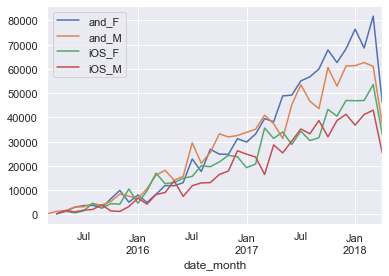

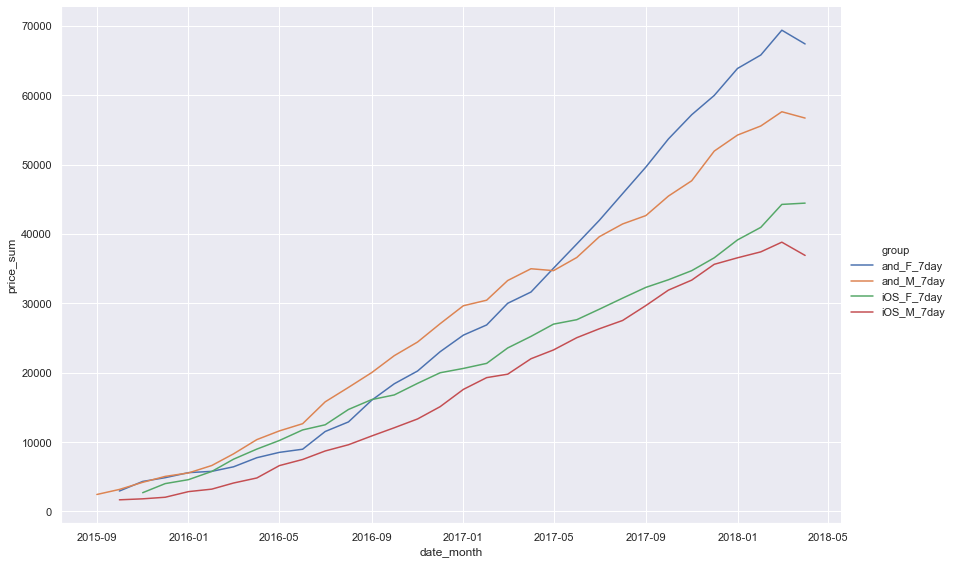

In [87]:
# smooth with window, for this need to pivot (segments metrics in separate columns)
uid_combined_data_groupped_pivot = pd.pivot_table(data=uid_combined_data_groupped,index='date_month',values='price_sum',columns=['device','gender'])
uid_combined_data_groupped_pivot.columns = uid_combined_data_groupped_pivot.columns.map('_'.join)
uid_combined_data_groupped_pivot.reset_index(inplace=True)
uid_combined_data_groupped_pivot.plot(x='date_month',y=['and_F','and_M','iOS_F','iOS_M'])
uid_combined_data_groupped_pivot['and_F_7day'] = uid_combined_data_groupped_pivot['and_F'].rolling(window=7).mean()
uid_combined_data_groupped_pivot['and_M_7day'] = uid_combined_data_groupped_pivot['and_M'].rolling(window=7).mean()
uid_combined_data_groupped_pivot['iOS_F_7day'] = uid_combined_data_groupped_pivot['iOS_F'].rolling(window=7).mean()
uid_combined_data_groupped_pivot['iOS_M_7day'] = uid_combined_data_groupped_pivot['iOS_M'].rolling(window=7).mean()
print(uid_combined_data_groupped_pivot.head(14))
# unpivot for plot with sns
uid_combined_data_groupped_pivot_unpivot = uid_combined_data_groupped_pivot.melt(id_vars=['date_month'],value_vars=['and_F_7day','and_M_7day','iOS_F_7day','iOS_M_7day'],var_name='group',value_name='price_sum')
print(uid_combined_data_groupped_pivot_unpivot.head())
sns.relplot(x='date_month',y='price_sum',hue='group',kind='line',height=8,aspect=1.5,data=uid_combined_data_groupped_pivot_unpivot)

In [88]:
#?pd.pivot_table
?pd.melt

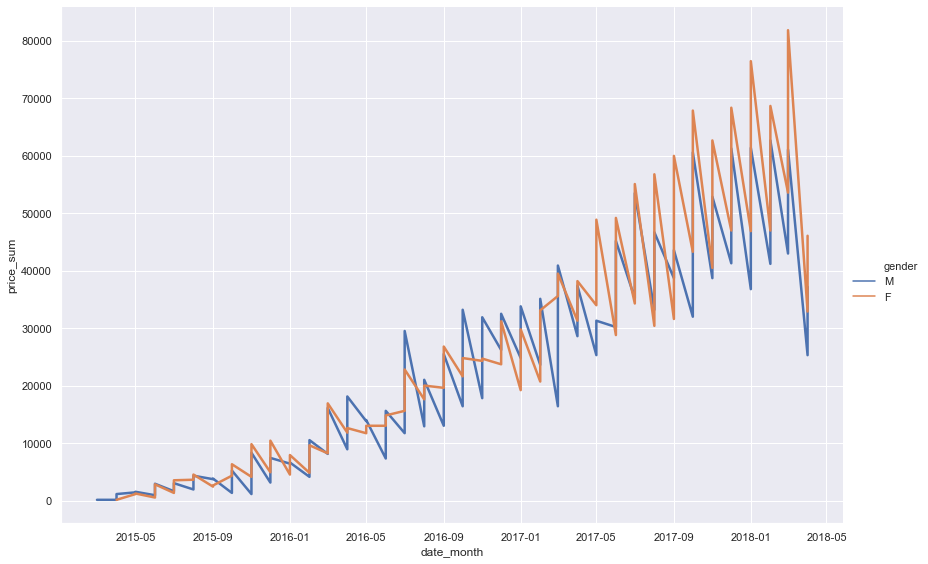

In [27]:
import seaborn as sns
from matplotlib import pyplot

# sum(price) vs date by gender
sns.set(style = 'darkgrid')
sns.relplot(x='date_month',y='price_sum',linewidth=2.5,height=8, aspect=1.5,hue='gender',kind='line',estimator=None,data=uid_combined_data_groupped)


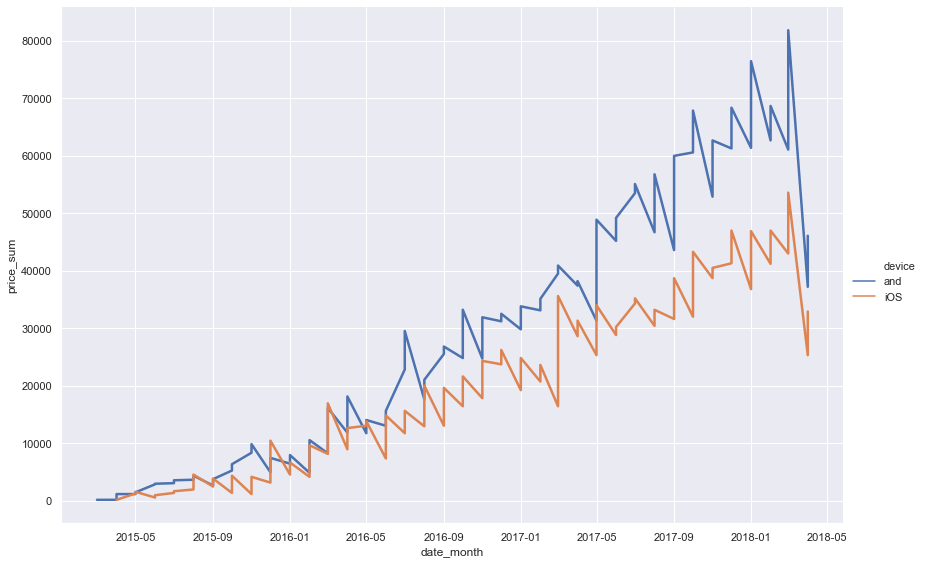

In [28]:
# sum(price) vs date by device
sns.relplot(x='date_month',y='price_sum',linewidth=2.5,height=8, aspect=1.5,hue='device',kind='line',estimator=None,data=uid_combined_data_groupped)


In [123]:
#g = sns.PairGrid(uid_combined_data_groupped, vars=['purchase_month1_sum',
#       'purchase_month1_mean', 'purchase_month1_median', 'price_sum',
#       'price_mean', 'price_median'],hue='gender')
#g.map(sns.scatterplot)

In [114]:
uid_combined_data_groupped.dropna().shape
uid_combined_data_groupped.shape

(148, 9)

5 Working with time series data in pandas.mp4

## Example: Week Two Conversion Rate

Week 2 Conversion Rate - Users who subscribed (purchased) in the second week after the free trial. So users must have:

- completed the free trial
- not subscribed in the first week
- had a full second week to subscribe or not

In [29]:
uid_combined_data.head()

,date,uid,sku,price,reg_date,device,gender,country,age,date_month,purchase_month1
0,2017-07-10,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,2017-07-01,499.0
1,2017-07-15,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,2017-07-01,499.0
2,2017-11-12,41195147,sku_four_599,599,2017-06-26,and,M,BRA,17,2017-11-01,NaN
3,2017-09-26,91591874,sku_two_299,299,2017-01-05,and,M,TUR,17,2017-09-01,NaN
4,2017-12-01,91591874,sku_four_599,599,2017-01-05,and,M,TUR,17,2017-11-01,NaN


### 1 filter relevant set of users

In [158]:
#uid_combined_data.drop('sub_time', axis = 1, inplace = True)

In [30]:
import pandas as pd
from datetime import timedelta

print(uid_combined_data.agg({'date':'max', 'reg_date':'max'}))

# define last reg date in our dataset
last_reg_date = uid_combined_data.reg_date.agg('max')
print(f"last_reg_date: {last_reg_date}")
# uid_combined_data.date.max()

max_reg_date_14 = last_reg_date - timedelta(14)
print(f'max_reg_date_14: {max_reg_date_14}')

# filter relevant set of users
conv_sub_data = uid_combined_data[uid_combined_data.reg_date < max_reg_date_14]
conv_sub_data.head()
#conv_sub_data.sub_time.drop


date        2018-04-21
reg_date    2018-03-17
dtype: object
last_reg_date: 2018-03-17
max_reg_date_14: 2018-03-03


,date,uid,sku,price,reg_date,device,gender,country,age,date_month,purchase_month1
0,2017-07-10,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,2017-07-01,499.0
1,2017-07-15,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,2017-07-01,499.0
2,2017-11-12,41195147,sku_four_599,599,2017-06-26,and,M,BRA,17,2017-11-01,NaN
3,2017-09-26,91591874,sku_two_299,299,2017-01-05,and,M,TUR,17,2017-09-01,NaN
4,2017-12-01,91591874,sku_four_599,599,2017-01-05,and,M,TUR,17,2017-11-01,NaN


### Step 2: Calculate the time between a users registration and purchase dates

In [31]:
conv_sub_data['sub_time'] = conv_sub_data.date - conv_sub_data.reg_date
conv_sub_data.head()

/Users/Andrew/Documents/python/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,uid,sku,price,reg_date,device,gender,country,age,date_month,purchase_month1,sub_time
0,2017-07-10,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,2017-07-01,499.0,14 days
1,2017-07-15,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,2017-07-01,499.0,19 days
2,2017-11-12,41195147,sku_four_599,599,2017-06-26,and,M,BRA,17,2017-11-01,NaN,139 days
3,2017-09-26,91591874,sku_two_299,299,2017-01-05,and,M,TUR,17,2017-09-01,NaN,264 days
4,2017-12-01,91591874,sku_four_599,599,2017-01-05,and,M,TUR,17,2017-11-01,NaN,330 days


In [32]:
# Convert sub_time from timedelta to an int
conv_sub_data['sub_time'] = conv_sub_data['sub_time'].dt.days
conv_sub_data.head()

/Users/Andrew/Documents/python/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,uid,sku,price,reg_date,device,gender,country,age,date_month,purchase_month1,sub_time
0,2017-07-10,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,2017-07-01,499.0,14
1,2017-07-15,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,2017-07-01,499.0,19
2,2017-11-12,41195147,sku_four_599,599,2017-06-26,and,M,BRA,17,2017-11-01,NaN,139
3,2017-09-26,91591874,sku_two_299,299,2017-01-05,and,M,TUR,17,2017-09-01,NaN,264
4,2017-12-01,91591874,sku_four_599,599,2017-01-05,and,M,TUR,17,2017-11-01,NaN,330


### Conversion rate calculation

In [33]:
# filter to users who have did not subscribe in the right window
conv_base = conv_sub_data[(conv_sub_data.sub_time.notnull()) | (conv_sub_data.sub_time > 7)] # why this is base CR?
total_users = len(conv_base)
print(total_users)
print(f'total: {len(conv_sub_data)}')
print(f'notnull: {sum(conv_sub_data.sub_time.notnull())}')
print(f'sub_time > 7: {sum(conv_sub_data.sub_time > 7)}')

8978
total: 8978
notnull: 8978
sub_time > 7: 8767


In [34]:
total_subs = np.where(conv_base.sub_time.notnull() & (conv_base.sub_time <= 14), 1, 0)
total_subs = sum(total_subs)
print(f'total_subs: {total_subs}')
print(f'len(conv_base.sub_time.notnull()): {len(conv_base.sub_time.notnull())}')

total_subs: 357
len(conv_base.sub_time.notnull()): 8978


In [35]:
conversion_rate = total_subs / total_users
print(conversion_rate)


0.03976386723100914


In [36]:
# AK
total_subs = np.where((conv_sub_data.sub_time <= 14) & (conv_sub_data.sub_time > 7), 1, 0)
total_subs = np.where((conv_sub_data.sub_time <= 14) & ((conv_sub_data.sub_time.notnull()) | (conv_sub_data.sub_time > 7)), 1, 0)
total_conversions = sum(total_subs)
print(total_conversions)

conversion_rate = total_conversions / total_users
print(f'conversion_rate: {conversion_rate}')
                              
                      

357
conversion_rate: 0.03976386723100914


In [39]:
print(sum((conv_sub_data.sub_time <= 14) & (conv_sub_data.sub_time > 7)))
print(sum((conv_sub_data.sub_time <= 14) & ((conv_sub_data.sub_time.notnull()) | (conv_sub_data.sub_time > 7))))

146
357


Don't understand the check ((conv_sub_data.sub_time.notnull()) | (conv_sub_data.sub_time > 7))

## Parsing dates

In this exercise you will practice parsing dates in Python. While often data pulled from a database will be correctly formatted, other data sources can be less nice. Knowing how to properly parse dates is crucial to get the data in a workable format. For reference refer to https://strftime.org/ throughout this exercise to see date format to use.

1 Provide the correct format for the following date:

Saturday January 27, 2017

In [43]:
date_str = 'Saturday January 27, 2017'
d = pd.to_datetime(date_str, format = '%A %B %d, %Y')
print(d)
print(type(d))
print(f'd.dayofweek: {d.dayofweek}')
print(f'd.date(): {d.date()}')
print(f'd.day: {d.day}')
print(f'd.day_name(): {d.day_name()}')
print(f'd.dayofyear: {d.dayofyear}')
print(f'd.days_in_month: {d.days_in_month}')
print(f'd.daysinmonth: {d.daysinmonth}')
print(f'd.timestamp: {d.timestamp}')
print(f'd.weekday(): {d.weekday()}')

2017-01-27 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
d.dayofweek: 4
d.date(): 2017-01-27
d.day: 27
d.day_name(): Friday
d.dayofyear: 27
d.days_in_month: 31
d.daysinmonth: 31
d.timestamp: <built-in method timestamp of Timestamp object at 0x7f8dfc9303d0>
d.weekday(): 4


In [110]:
?pd.to_datetime

2 Provide the correct format for the following date:

2017-08-01

In [263]:
date_str = '2017-08-01'
d = pd.to_datetime(date_str, format = '%Y-%m-%d')
d1 = pd.to_datetime(date_str, format = '%Y-%m-%d').date()
print(d)
print(type(d))
print(d1)
print(type(d1))

2017-08-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2017-08-01
<class 'datetime.date'>


3 Provide the correct format for the following date.

08/17/1978

In [119]:
date_str = '08/17/1978'
d = pd.to_datetime(date_str, format = '%m/%d/%Y')
#d = pd.to_datetime(date_str, format = '%m-%d-%Y')
#d = pd.to_datetime(date_str)
print(d)
print(type(d))

1978-08-17 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


4 Provide the correct format for the following date:

2016 March 01 01:56

In [124]:
date_str = '2016 March 01 01:56'
d = pd.to_datetime(date_str, format = '%Y %B %d %H:%M')
#d = pd.to_datetime(date_str, format = '%m-%d-%Y')
#d = pd.to_datetime(date_str)
print(d)
print(type(d))

2016-03-01 01:56:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


6 Creating time series graphs with matplotlib.mp4

## Plotting time series data

In trying to boost purchases, we have made some changes to our introductory in-app purchase pricing. In this exercise, you will check if this is having an impact on the number of purchases made by purchasing users during their first week.

The dataset user_purchases has been joined to the demographics data and properly filtered. The column 'first_week_purchases' that is 1 for a first week purchase and 0 otherwise has been added. This column is converted to the average number of purchases made per day by users in their first week.

We will try to view the impact of this change by looking at a graph of purchases as described in the instructions.

1 Read through and understand code shown and then plot the user_purchases data with 'reg_date' on the x-axis and 'first_week_purchases' on the y-axis.

In [49]:
# add first_week_purchases column to our dataset like in the task
uid_combined_data['first_week_purchases'] = np.where((uid_combined_data.date - uid_combined_data.reg_date) < timedelta(days=7), 1, 0) 
print(uid_combined_data['first_week_purchases'].sum())
print(uid_combined_data.shape)
uid_combined_data[uid_combined_data['first_week_purchases'] == 1].head()                                                 

                                                   

197
(9006, 12)


,date,uid,sku,price,reg_date,device,gender,country,age,date_month,purchase_month1,first_week_purchases
34,2017-01-12,88736154,sku_five_899,899,2017-01-08,and,F,BRA,19,2017-01-01,899.0,1
121,2017-10-07,68561600,sku_three_499,499,2017-10-01,and,F,USA,34,2017-10-01,499.0,1
154,2016-03-30,94055095,sku_four_599,599,2016-03-30,iOS,F,BRA,16,2016-03-01,599.0,1
173,2015-10-28,69627745,sku_one_199,199,2015-10-28,and,F,BRA,18,2015-10-01,199.0,1
191,2017-12-26,17706865,sku_four_599,599,2017-12-25,iOS,M,USA,32,2017-12-01,599.0,1


1
                    first_week_purchases
                                     sum
reg_date   uid                          
2015-01-27 27462048                    0
2015-02-01 43346610                    0
2015-02-09 46828176                    0
2015-02-10 26610027                    0
2015-03-01 93873145                    0
MultiIndex([('first_week_purchases', 'sum')],
           )
2
                     first_week_purchases
reg_date   uid                           
2015-01-27 27462048                     0
2015-02-01 43346610                     0
2015-02-09 46828176                     0
2015-02-10 26610027                     0
2015-03-01 93873145                     0
3
     reg_date       uid  first_week_purchases
0  2015-01-27  27462048                     0
1  2015-02-01  43346610                     0
2  2015-02-09  46828176                     0
3  2015-02-10  26610027                     0
4  2015-03-01  93873145                     0
4
     reg_date  first_week_purchases

<AxesSubplot:xlabel='reg_date'>

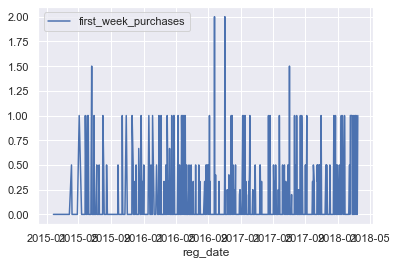

In [50]:
import matplotlib as plt

# Group by data and uid and aggregate first_week_purchases
user_purchases = uid_combined_data.groupby(by=['reg_date','uid']).agg({'first_week_purchases':['sum']})
print(1)
print(user_purchases.head())

# Reset the indexes
print(user_purchases.columns)
user_purchases.columns = user_purchases.columns.droplevel(level=1)
print(2)
print(user_purchases.head())
user_purchases.reset_index(inplace=True)
print(3)
print(user_purchases.head())

# Find the average number of first-week purchases per user
user_purchases = user_purchases.groupby('reg_date').agg({'first_week_purchases':'mean'})
# !!! Here we calculate avg quantity of purchases per user per day (because aggregated also by uid ^)
user_purchases.reset_index(inplace=True)
print(4)
print(user_purchases.head())

# Avg quantity of purchases per day (not day & user)
user_purchases_1 = uid_combined_data.groupby('reg_date').agg({'first_week_purchases':'mean'})
user_purchases_1.reset_index(inplace=True)

print(5)
print(user_purchases_1.head())

# Plot the results
user_purchases.plot(x = 'reg_date', y = 'first_week_purchases')
#plt.show()
#user_purchases_1.plot(x = 'reg_date', y = 'first_week_purchases')



Fantastic Job! There does indeed seem to be a substantial increase in the average number of first week purchases! (AK: data in datacamp console is different, 10 times more rows!)

## Pivoting our data

As you saw, there does seem to be an increase in the number of purchases by purchasing users within their first week. Let's now confirm that this is not driven only by one segment of users. We'll do this by first pivoting our data by 'country' and then by 'device'. Our change is designed to impact all of these groups equally.

The user_purchases data from before has been grouped and aggregated by the 'country' and 'device' columns. These objects are available in your workspace as user_purchases_country and user_purchases_device.

As a reminder, .pivot_table() has the following signature:

pd.pivot_table(data, values, columns, index)

1 Pivot the user_purchases_country table such that we have our first_week_purchases as our values, the country as the column, and our reg_date as the row.

In [51]:
# AK: prepare the same datasets like in the lab
user_purchases_country = uid_combined_data.groupby(['reg_date','country','uid']).agg({'first_week_purchases':'sum'}).groupby(['reg_date','country']).agg({'first_week_purchases':'mean'})
user_purchases_country.reset_index(inplace=True)

print(user_purchases_country.head())

user_purchases_country_pivot = pd.pivot_table(data=user_purchases_country,
                                             values=['first_week_purchases'],
                                             columns=['country'],
                                             index=['reg_date'])
# reset indexes (without this plot doesn't work)
user_purchases_country_pivot.columns = user_purchases_country_pivot.columns.droplevel(level=0)
user_purchases_country_pivot.reset_index(inplace = True)
print(user_purchases_country_pivot.head())

     reg_date country  first_week_purchases
0  2015-01-27     USA                   0.0
1  2015-02-01     BRA                   0.0
2  2015-02-09     USA                   0.0
3  2015-02-10     USA                   0.0
4  2015-03-01     USA                   0.0
country    reg_date  BRA  CAN  DEU  FRA  TUR  USA
0        2015-01-27  NaN  NaN  NaN  NaN  NaN  0.0
1        2015-02-01  0.0  NaN  NaN  NaN  NaN  NaN
2        2015-02-09  NaN  NaN  NaN  NaN  NaN  0.0
3        2015-02-10  NaN  NaN  NaN  NaN  NaN  0.0
4        2015-03-01  NaN  NaN  NaN  NaN  NaN  0.0


In [52]:
# check purchases for 2015-02-01
print(uid_combined_data.head())
print(type(uid_combined_data.reg_date[1]))
print(pd.to_datetime('2015-02-01', format='%Y-%m-%d').date())
uid_combined_data[uid_combined_data.reg_date == pd.to_datetime('2015-02-01', format='%Y-%m-%d').date()]


         date       uid            sku  price    reg_date device gender  \
0  2017-07-10  41195147  sku_three_499    499  2017-06-26    and      M   
1  2017-07-15  41195147  sku_three_499    499  2017-06-26    and      M   
2  2017-11-12  41195147   sku_four_599    599  2017-06-26    and      M   
3  2017-09-26  91591874    sku_two_299    299  2017-01-05    and      M   
4  2017-12-01  91591874   sku_four_599    599  2017-01-05    and      M   

  country  age date_month  purchase_month1  first_week_purchases  
0     BRA   17 2017-07-01            499.0                     0  
1     BRA   17 2017-07-01            499.0                     0  
2     BRA   17 2017-11-01              NaN                     0  
3     TUR   17 2017-09-01              NaN                     0  
4     TUR   17 2017-11-01              NaN                     0  
<class 'datetime.date'>
2015-02-01


,date,uid,sku,price,reg_date,device,gender,country,age,date_month,purchase_month1,first_week_purchases
7355,2017-05-15,43346610,sku_three_499,499,2015-02-01,and,M,BRA,15,2017-05-01,NaN,0
7356,2017-12-05,43346610,sku_two_299,299,2015-02-01,and,M,BRA,15,2017-12-01,NaN,0
7357,2018-01-31,43346610,sku_four_599,599,2015-02-01,and,M,BRA,15,2018-01-01,NaN,0
7358,2018-03-08,43346610,sku_three_499,499,2015-02-01,and,M,BRA,15,2018-03-01,NaN,0
7359,2015-08-01,43346610,sku_one_199,199,2015-02-01,and,M,BRA,15,2015-07-01,NaN,0
7360,2016-12-17,43346610,sku_one_199,199,2015-02-01,and,M,BRA,15,2016-12-01,NaN,0
7361,2017-08-15,43346610,sku_two_299,299,2015-02-01,and,M,BRA,15,2017-08-01,NaN,0


2 Now lets look at our device data. Let us pivot the user_purchases_device table such that we have our first_week_purchases as our values, the device as the column, and our reg_date as the row.

In [53]:
# prepare the same datasets like in the lab
user_purchases_device = uid_combined_data.groupby(['reg_date','device','uid']).agg({'first_week_purchases':'sum'}).groupby(['reg_date','device']).agg({'first_week_purchases':'mean'})
user_purchases_device.reset_index(inplace=True)
print(user_purchases_device.head())

user_purchases_device_pivot = pd.pivot_table(data=user_purchases_device,
                                             values=['first_week_purchases'],
                                             columns=['device'],
                                             index=['reg_date'])
# reset indexes (without this plot doesn't work)
user_purchases_device_pivot.columns = user_purchases_device_pivot.columns.droplevel(level=0)
user_purchases_device_pivot.reset_index(inplace = True)
print(user_purchases_device_pivot.head())


     reg_date device  first_week_purchases
0  2015-01-27    iOS                   0.0
1  2015-02-01    and                   0.0
2  2015-02-09    and                   0.0
3  2015-02-10    iOS                   0.0
4  2015-03-01    iOS                   0.0
device    reg_date  and  iOS
0       2015-01-27  NaN  0.0
1       2015-02-01  0.0  NaN
2       2015-02-09  0.0  NaN
3       2015-02-10  NaN  0.0
4       2015-03-01  NaN  0.0


## Examining the different cohorts

To finish this lesson, you're now going to plot by 'country' and then by 'device' and examine the results. Hopefully you will see the observed lift across all groups as designed. This would point to the change being the cause of the lift, not some other event impacting the purchase rate.

1 Plot the average first week purchases for each country by registration date ('reg_date'). There are 6 countries here: 'USA', 'CAN', 'FRA', 'BRA', 'TUR', and 'DEU'. Plot them in the order shown.

<AxesSubplot:xlabel='reg_date'>

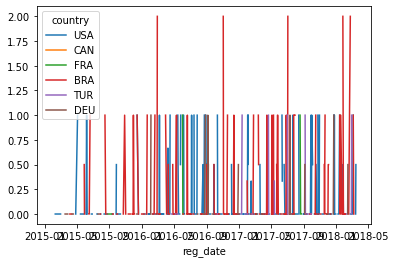

In [286]:
user_purchases_country_pivot.plot(x = 'reg_date', y = ['USA', 'CAN', 'FRA', 'BRA', 'TUR', 'DEU'])


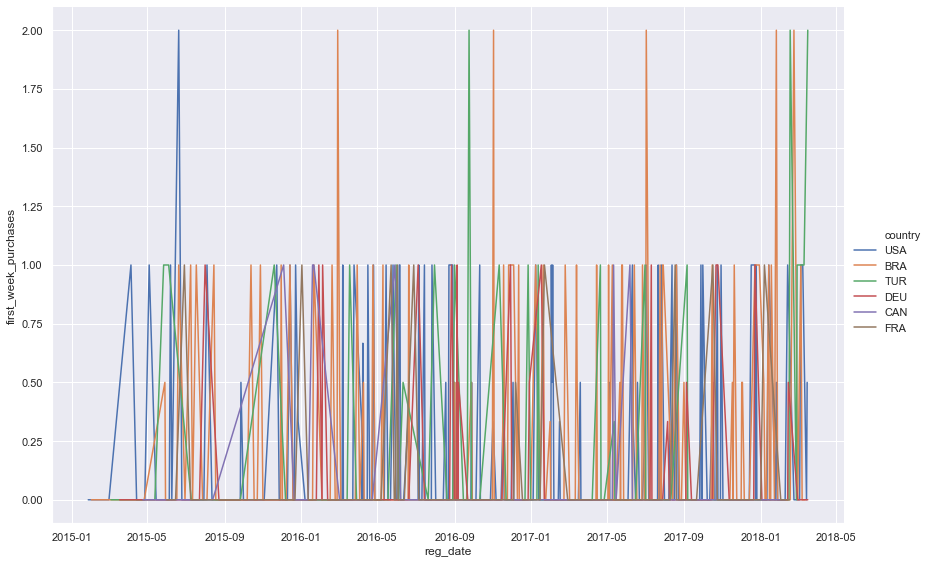

In [59]:
# plot with seaborn (don't need pivoting)

import seaborn as sns
sns.relplot(x='reg_date',y='first_week_purchases',kind='line',hue='country',height=8, aspect=1.5,data=user_purchases_country)

2 Now, plot the average first week purchases for each device ('and' and 'iOS') by registration date ('reg_date'). Plot the devices in the order listed.

<AxesSubplot:xlabel='reg_date'>

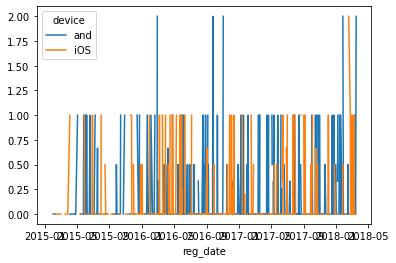

In [292]:
user_purchases_device_pivot.plot(x = 'reg_date', y = ['and','iOS'])

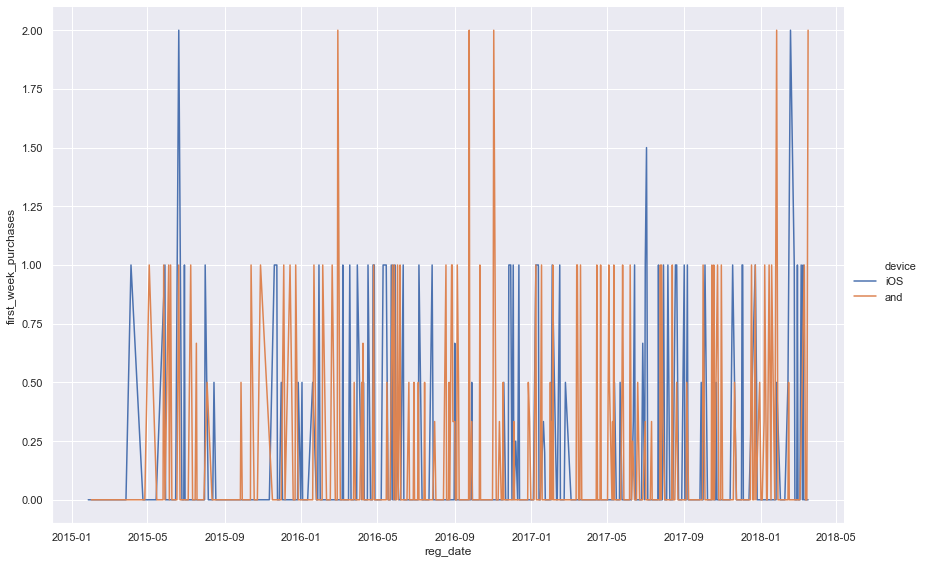

In [60]:
sns.relplot(x='reg_date',y='first_week_purchases',kind='line',hue='device',height=8, aspect=1.5,data=user_purchases_device)


device    reg_date  and  iOS  and_7_days  ios_7_days
0       2015-01-27  NaN  0.0         NaN         NaN
1       2015-02-01  0.0  NaN         NaN         NaN
2       2015-02-09  0.0  NaN         NaN         NaN
3       2015-02-10  NaN  0.0         NaN         NaN
4       2015-03-01  NaN  0.0         NaN         NaN


<AxesSubplot:xlabel='reg_date'>

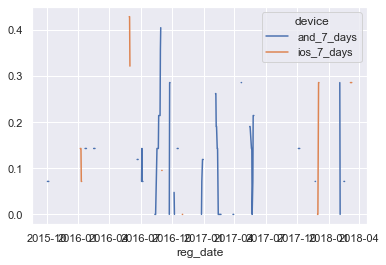

In [62]:
user_purchases_device_pivot['and_7_days'] = user_purchases_device_pivot['and'].rolling(window=7).mean()
user_purchases_device_pivot['ios_7_days'] = user_purchases_device_pivot['iOS'].rolling(window=7).mean()
print(user_purchases_device_pivot.head())
user_purchases_device_pivot.plot(x='reg_date',y=['and_7_days','ios_7_days'])


Great, it looks like our change is causing the observed result! Expand the plot into a new window to see it in more detail.

7 Understanding and visualizing trends.mp4

## Seasonality and moving averages

Stepping back, we will now look at the overall revenue data for our meditation app. We saw strong purchase growth in one of our products, and now we want to see if that is leading to a corresponding rise in revenue. As you may expect, revenue is very seasonal, so we want to correct for that and unlock macro trends.

In this exercise, we will correct for weekly, monthly, and yearly seasonality and plot these over our raw data. This can reveal trends in a very powerful way.

The revenue data is loaded for you as daily_revenue.

- Using the .rolling() method, find the rolling average of the data with a 7 day window and store it in a column 7_day_rev.
- Find the monthly (28 days) rolling average and store it in a column 28_day_rev.
- Find the yearly (365 days) rolling average and store it in a column 365_day_rev.
- Hit 'Submit Answer' to plot the three calculated rolling averages together along with the raw data.

In [20]:
daily_revenue_raw = pd.read_csv('/Users/Andrew/Downloads/(DataCamp) Customer Analytics and A:B Testing in Python/daily_revenue.csv')
daily_revenue_raw['date'] = pd.to_datetime(daily_revenue_raw['date']).dt.date
daily_revenue_raw.head()

,index,gender,device,revenue,date,country
0,1,male,ios,186557.0,2013-09-20,USA
1,2,male,ios,177217.0,2013-09-21,USA
2,3,male,ios,177197.0,2013-09-22,USA
3,4,male,ios,157193.0,2013-09-23,USA
4,5,male,ios,165592.0,2013-09-24,USA


In [21]:
# AK: calculate revenue by day as in the lab
daily_revenue = daily_revenue_raw.groupby('date').agg({'revenue': 'sum'})
daily_revenue.head()
# result corresponds to the lab

,revenue
date,
2013-09-20,1040405.0
2013-09-21,998827.0
2013-09-22,950908.0
2013-09-23,890947.0
2013-09-24,942562.0


<AxesSubplot:xlabel='date'>

<Figure size 1080x576 with 0 Axes>

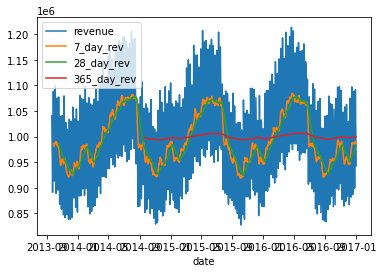

In [22]:
# Compute 7_day_rev
daily_revenue['7_day_rev'] = daily_revenue.revenue.rolling(window=7, center=False).mean()
daily_revenue['28_day_rev'] = daily_revenue.revenue.rolling(window=28, center=False).mean()
daily_revenue['365_day_rev'] = daily_revenue.revenue.rolling(window=365, center=False).mean()
daily_revenue.reset_index(inplace=True)
daily_revenue.head(50)
plt.figure(figsize=(15,8))
daily_revenue.plot(x='date', y=['revenue','7_day_rev','28_day_rev','365_day_rev'])


         date   window      value
0  2013-09-20  revenue  1040405.0
1  2013-09-21  revenue   998827.0
2  2013-09-22  revenue   950908.0
3  2013-09-23  revenue   890947.0
4  2013-09-24  revenue   942562.0


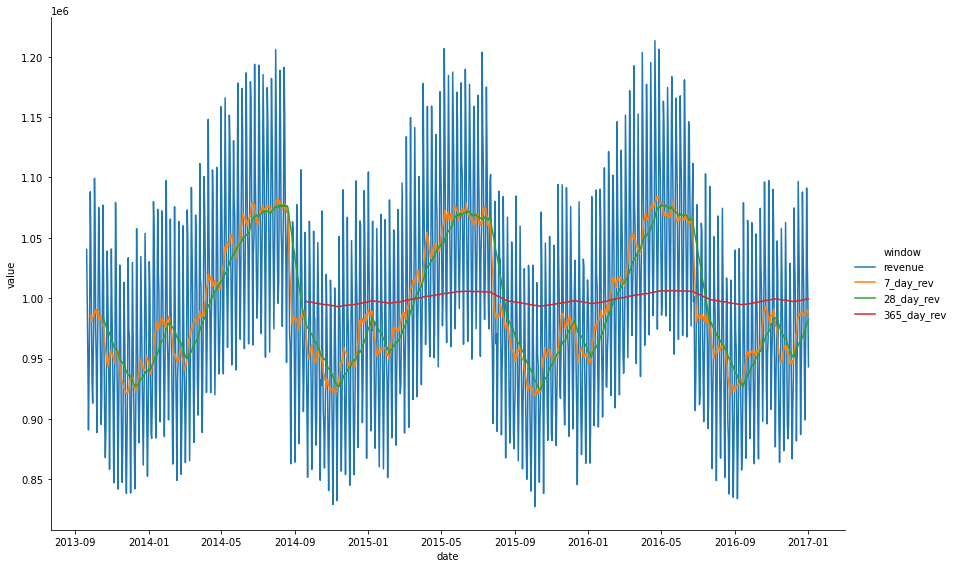

In [19]:
# plot with sns
daily_revenue_unpivoted = pd.melt(daily_revenue,id_vars=['date'],var_name='window',value_vars=['revenue','7_day_rev','28_day_rev','365_day_rev'],value_name='value')
print(daily_revenue_unpivoted.head())
sns.relplot(x='date',y='value',data=daily_revenue_unpivoted,hue='window',height=8,aspect=1.5,kind='line')


In [16]:
?pd.melt

Great work! Notice that while there is a lot of seasonality, our revenue seems to be somewhat flat over this time period.

## Exponential rolling average & over/under smoothing

In the previous exercise, we saw that our revenue is somewhat flat over time. In this exercise we will dive deeper into the data to see if we can determine why this is the case. We will look at the revenue for a single in-app purchase product we are selling to see if this potentially reveals any trends. As this will have less data then looking at our overall revenue it will be much noisier. To account for this we will smooth the data using an exponential rolling average.

A new daily_revenue dataset has been provided for us, containing the revenue for this product.

- Using the .ewm() method, calculate the exponential rolling average with a span of 10 and store it in a column small_scale.
- Repeat the previous step, now with a span of 100 and store it in a column medium_scale.
- Finally, calculate the exponential rolling average with a span of 500 and store it in a column large_scale.
- Plot the three averages, along with the raw data. Examine how clear the trend of the data is.

In [337]:
uid_combined_data.sort_values('date').head(10)

,date,uid,sku,price,reg_date,device,gender,country,age,first_week_purchases
4081,2015-03-02,46828176,sku_one_199,199,2015-02-09,and,M,USA,23,0
4090,2015-04-04,46828176,sku_two_299,299,2015-02-09,and,M,USA,23,0
1570,2015-04-10,92675588,sku_one_199,199,2015-04-05,iOS,M,USA,33,1
7682,2015-04-15,67550454,sku_five_899,899,2015-04-07,and,M,TUR,25,0
5506,2015-04-15,78662707,sku_one_199,199,2015-04-05,and,F,BRA,16,0
5774,2015-05-05,81751161,sku_two_299,299,2015-05-04,and,F,USA,40,1
7999,2015-05-09,26310500,sku_three_499,499,2015-04-12,and,F,BRA,26,0
2500,2015-05-13,68728550,sku_eight_2099,99,2015-03-28,iOS,M,DEU,32,0
5542,2015-05-13,76414302,sku_eight_2099,99,2015-04-27,and,F,USA,18,0
1571,2015-05-17,92675588,sku_six_1299,299,2015-04-05,iOS,M,USA,33,0


In [338]:
uid_combined_data.groupby('date').agg({'price':'sum'}).sort_index().head(10)
# check for 2015-04-15 in both datasets
# summary data on price from uid_combined_data do not correspond to daily_revenue data... -> can't filter on specific product like in the lab


,price
date,
2015-03-02,199
2015-04-04,299
2015-04-10,199
2015-04-15,1098
2015-05-05,299
2015-05-09,499
2015-05-13,198
2015-05-17,798
2015-05-19,199


<AxesSubplot:xlabel='date'>

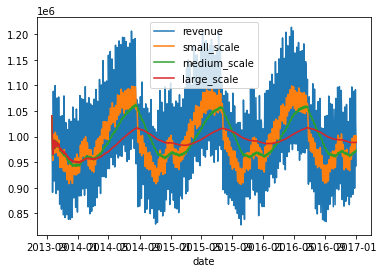

In [339]:
# can't understand for which product in the lab he has data. Do the lab for daily_revenue

# Calculate 'small_scale'
daily_revenue['small_scale'] = daily_revenue.revenue.ewm(span=10).mean()
# Calculate 'medium_scale'
daily_revenue['medium_scale'] = daily_revenue.revenue.ewm(span=100).mean()
# Calculate 'small_scale'
daily_revenue['large_scale'] = daily_revenue.revenue.ewm(span=500).mean()
daily_revenue.head(110)
daily_revenue.plot(x = 'date', y = ['revenue','small_scale','medium_scale','large_scale'])


In the lab for data for specific product we saw the trend (http://joxi.ru/Y2LdjY0txP3Nl2).

Great work! Note that the medium window strikes the right balance. Revenue seems to be growing in this product so it must not be the cause of the overall flat revenue trend!

8 Events and releases.mp4

In [23]:
print(type(daily_revenue_raw['date'][1]))

<class 'datetime.date'>


In [24]:
# data preparation like in the lab
#daily_revenue_raw.head()
daily_revenue_raw['month'] = daily_revenue_raw['date'] + pd.offsets.MonthBegin(-1)
print(daily_revenue_raw.head())
#daily_revenue_raw.drop('Month', axis=1, inplace=True)

# summarize by month, gender, device
user_revenue = daily_revenue_raw.groupby(['month','gender','device']).agg({'revenue':'sum'})
user_revenue.reset_index(inplace=True)
print(user_revenue.head(10))
# dataset corresponds more and less to the lab

   index gender device   revenue        date country      month
0      1   male    ios  186557.0  2013-09-20     USA 2013-09-01
1      2   male    ios  177217.0  2013-09-21     USA 2013-09-01
2      3   male    ios  177197.0  2013-09-22     USA 2013-09-01
3      4   male    ios  157193.0  2013-09-23     USA 2013-09-01
4      5   male    ios  165592.0  2013-09-24     USA 2013-09-01
       month  gender   device     revenue
0 2013-09-01  female  android   1251840.0
1 2013-09-01  female      ios   1682214.0
2 2013-09-01    male  android   3758571.0
3 2013-09-01    male      ios   5029926.0
4 2013-10-01  female  android   3233367.0
5 2013-10-01  female      ios   4349659.0
6 2013-10-01    male  android   9693553.0
7 2013-10-01    male      ios  12860179.0
8 2013-11-01  female  android   2988431.0
9 2013-11-01  female      ios   4008339.0


Instructions:
- Pivot user_revenue such that we have the 'month' as the rows (index),'device' and 'gender' as our columns and 'revenue' as our values.
- Remove the first and last row of the DataFrame once pivoted to prevent discontinuities from distorting the results. This has been done for you.
- Plot pivoted_data using its .plot() method.

gender         female                  male            
device        android        ios    android         ios
month                                                  
2013-09-01  1251840.0  1682214.0  3758571.0   5029926.0
2013-10-01  3233367.0  4349659.0  9693553.0  12860179.0
2013-11-01  2988431.0  4008339.0  9006443.0  12068942.0
2013-12-01  3098972.0  4188215.0  9303140.0  12394112.0
2014-01-01  3249395.0  4304609.0  9746197.0  13007980.0


<AxesSubplot:xlabel='month'>

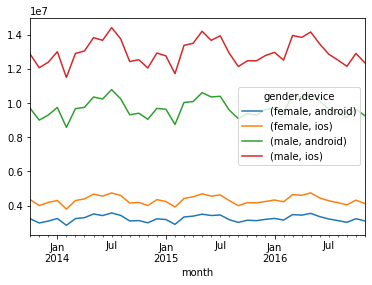

In [26]:
# pivot
user_revenue_pivot = pd.pivot_table(data=user_revenue, values='revenue',columns=['gender','device'],index='month')
print(user_revenue_pivot.head())
# remove non-complete 1st and last months
user_revenue_pivot = user_revenue_pivot[1:len(user_revenue_pivot)-1]
# Create and show the plot
user_revenue_pivot.plot()

Great work! From this view, it seems like our aggregate revenue is fairly stable, so the changes are most likely not hurting revenue.

9 Introduction to A/B testing.mp4

## A/B test generalizability

Listed below are a set of decisions that could be made when designing an A/B test. Identify the decision that would not cause an issue in generalizing the test results to the overall user population.

Possible Answers

- Assigning users to the Test or Variant group based on their signup year.

Incorrect
False, your user base may evolve over time and this could potentially be introducing a bias.

- Using a hash of the randomly assigned user id to determine user groupings.

Correct! This is a fine thing to do and a common way to tie the group a user belongs to to their identity.

- Randomly assigning users within one country to different groups.
press

Incorrect
False, this would be generalizable to users within that country, but potentially not to users in other places.

- Allowing users to change groups every time they use the service or software.

Incorrect
False, your user base may evolve over time and this could potentially be introducing a bias.


10 Initial A/B test design.mp4

## Experimental units: Revenue per user day

We are going to check what happens when we add a consumable paywall to our app. A paywall is a feature of a website or other technology that requires payment from users in order to access additional content or services.

Here, you'll practice calculating experimental units and baseline values related to our consumable paywall. Both measure revenue only among users who viewed a paywall. Your job is to calculate revenue per user-day, with user-day as the experimental unit.

The purchase_data dataset has been loaded for you.

- Extract the 'day' value from the date timestamp as you saw in the video: Using .date.dt.floor('d').

- To make the calculations easier, replace the NaN purchase_data.price values with 0 by using the np.where() method.

- Finally, find the mean amount paid per user-day among paywall viewers. To do this, you need to first aggregate the data by 'uid' and 'date', which has been done for you.

In [31]:
purchase_data_raw = pd.read_csv('/Users/Andrew/Downloads/(DataCamp) Customer Analytics and A:B Testing in Python/purchase_data_v1.csv')
user_demographics = pd.read_csv('/Users/Andrew/Downloads/(DataCamp) Customer Analytics and A:B Testing in Python/user_demographics_v1.csv')
purchase_data_merged = purchase_data_raw.merge(user_demographics, on = ['uid'], how = 'left')
# Extract the 'day'; value from the timestamp
purchase_data_merged.date = pd.to_datetime(purchase_data_merged.date).dt.date
# purchase_data_merged.date = pd.to_datetime(purchase_data_merged.date).dt.floor('d') # doesn't work
purchase_data_merged.reg_date = pd.to_datetime(purchase_data_merged.reg_date).dt.date
# Replace the NaN price values with 0 
purchase_data_merged.price =np.where(np.isnan(purchase_data_merged.price), 0,purchase_data_merged.price) 
print(purchase_data_raw.shape)
print(user_demographics.shape)
print(purchase_data_merged.shape)
purchase_data_merged.head()
#purchase_data_merged[purchase_data_merged['reg_date'].isna()]
#purchase_data_merged[purchase_data_merged['reg_date'].isnull()]


(9006, 4)
(10000, 6)
(9006, 9)


,date,uid,sku,price,reg_date,device,gender,country,age
0,2017-07-10,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17
1,2017-07-15,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17
2,2017-11-12,41195147,sku_four_599,599,2017-06-26,and,M,BRA,17
3,2017-09-26,91591874,sku_two_299,299,2017-01-05,and,M,TUR,17
4,2017-12-01,91591874,sku_four_599,599,2017-01-05,and,M,TUR,17


In [32]:
purchase_data_merged[np.isnan(purchase_data_merged.price)]
#purchase_data_merged.head()

,date,uid,sku,price,reg_date,device,gender,country,age


In [33]:
# Aggregate the data by 'uid' & 'date'
revenue_user_day = purchase_data_merged.groupby(by=['uid','date'], as_index=False).agg({'price':['sum']})
# Calculate the final average
revenue_user_day = revenue_user_day.price.mean()
print(f'Avg revenue per user per day: {revenue_user_day}')


Avg revenue per user per day: sum    407.950334
dtype: float64


Awesome work! Values such as these will provide helpful context as you prepare your experiment. Now lets learn how to run an A/B test.

11 Preparing to run an A/B test.mp4

## Conversion rate sensitivities

To mix things up, we will spend the next few exercises working with the conversion rate metric we explored in Chapter One. Specifically you will work to examine what that value becomes under different percentage lifts and look at how many more conversions per day this change would result in. First you will find the average number of paywall views and purchases that were made per day in our observed sample. Good luck!

- Merge the paywall_views with demographics_data tables using an 'inner' join. This will limit the result to only include users who appear in both and will remove everyone who did not view a paywall, which is what we want in this scenario.
- Group purchase_data by 'date'. The result of this is then aggregated for you by summing over the purchase field to find the total number of purchases and counting over it to find the total number of paywall views. (in the video we did per price!)
- Average each of the resulting sum and count fields to find the average number of purchases and paywall views per day.
- The results reflect a sample of 0.1% of our overall population for ease of use. Multiply each of daily_purchases and daily_paywall_views by 1000 so our result reflects the magnitude change if we had been observing the entire population.

In [401]:
# lab
paywall_views.head()

#        uid                      date  purchase  sku  price
#0  32209877 2016-12-04 14:20:49+00:00         0  NaN    NaN
#1  32209877 2016-12-05 22:17:12+00:00         0  NaN    NaN
#2  32209877 2016-12-09 17:56:09+00:00         0  NaN    NaN
#3  32209877 2016-12-13 03:07:08+00:00         0  NaN    NaN
#4  32209877 2016-12-14 17:19:29+00:00         0  NaN    NaN

IndentationError: unexpected indent (<ipython-input-401-3bf79c730ac3>, line 3)

In [ ]:
# lab
demographics_data.head()

#        uid                  reg_date device gender country  age
#0  52774929 2018-03-07 00:00:00+00:00    and      F     FRA   27
#1  40143397 2016-07-02 00:00:00+00:00    and      F     DEU   56
#2  89856430 2017-06-05 00:00:00+00:00    and      M     TUR   31
#3  76188504 2016-09-24 00:00:00+00:00    iOS      M     BRA   54
#4  76493748 2017-06-07 00:00:00+00:00    iOS      M     BRA   24

In [ ]:
# lab
# Merge and group the datasets
purchase_data = demographics_data.merge(paywall_views,  how='inner', on=['uid'])
purchase_data.date = purchase_data.date.dt.floor('d')
print(purchase_data.head())
#        uid                  reg_date device gender country  age                      date  purchase  sku  price
#0  52774929 2018-03-07 00:00:00+00:00    and      F     FRA   27 2018-03-10 00:00:00+00:00         0  NaN    NaN
#1  52774929 2018-03-07 00:00:00+00:00    and      F     FRA   27 2018-03-11 00:00:00+00:00         0  NaN    NaN
#2  52774929 2018-03-07 00:00:00+00:00    and      F     FRA   27 2018-03-12 00:00:00+00:00         0  NaN    NaN
#3  40143397 2016-07-02 00:00:00+00:00    and      F     DEU   56 2016-07-08 00:00:00+00:00         0  NaN    NaN
#4  40143397 2016-07-02 00:00:00+00:00    and      F     DEU   56 2016-07-11 00:00:00+00:00         0  NaN    NaN
print(purchase_data.purchase.unique())
# [0 1]

# Group and aggregate our combined dataset 
# AK: don't group by uid below because the athor calculates conversions per pageview! not per user
daily_purchase_data = purchase_data.groupby(by=['date'], as_index=False)
daily_purchase_data = daily_purchase_data.agg({'purchase': ['sum', 'count']})
print(daily_purchase_data.head())
#                       date purchase      
#                                 sum count
#0 2015-02-05 00:00:00+00:00        0     2
#1 2015-02-14 00:00:00+00:00        0     1
#2 2015-02-21 00:00:00+00:00        0     1
#3 2015-02-25 00:00:00+00:00        0     1
#4 2015-02-26 00:00:00+00:00        0     1
# sum:: sum of purchases, count:: number of pageviews

# Find the mean of each field and then multiply by 1000 (AK: ??) to scale the result
daily_purchases = daily_purchase_data.purchase['sum'].mean() # mean number of purchases per day
daily_paywall_views = daily_purchase_data.purchase['count'].mean() # mean number of pageviews per day
daily_purchases = daily_purchases * 1000
daily_paywall_views = daily_paywall_views * 1000

print(daily_purchases)
# 3181.8181818181815
print(daily_paywall_views)
# 91731.86409550045

conversion_rate = daily_purchases/daily_paywall_views
print(conversion_rate)
# 0.034667

# CR pageview to purchase can be calculated like this (from video 11, 3:23):
purchase_data = demographics_data.merge(paywall_views, how='inner',on=['uid'])
# CR = total purchases / total paywall views
conversion_rate = (sum(purchase_data.purchase) / purchase_data.purchase.count())
print(conversion_rate)
# 0.347


Great work! In the next exercise you will use this to evaluate different sensitivities.

## Sensitivity

Continuing with the conversion rate metric, you will now utilize the results from the previous exercise to evaluate a few potential sensitivities that we could make use of in planning our experiment. The baseline conversion_rate has been loaded for you, calculated in the same way we saw in Chapter One. Additionally the daily_paywall_views and daily_purchases values you calculated previously have been loaded.

1 Using the proposed small_sensitivity of 0.1, find the lift in conversion rate and purchasers that would result by applying this sensitivity. Are these resulting values reasonable?

In [ ]:
# lab

print(conversion_rate)
# 0.03468

small_sensitivity = 0.1 

# Find the conversion rate when increased by the percentage of the sensitivity above
small_conversion_rate = conversion_rate * (1 + small_sensitivity) 

# Apply the new conversion rate to find how many more users per day that translates to
small_purchasers = daily_paywall_views * small_conversion_rate # because conversion_rate = purchases / paywall_views

# Subtract the initial daily_purcahsers number from this new value to see the lift
purchaser_lift = small_purchasers - daily_purchases

print(small_conversion_rate)
print(small_purchasers)
print(purchaser_lift)
# 0.03468
# 0.03814800000000001
# 3499.384706400001 
# 317.58470640000087

2 Now repeating the steps from before, find the lift in conversion rate and purchasers using the medium_sensitivity. In this exercise you are additionally asked to complete the step to find the increase in purchasers based on this new conversion rate.

In [ ]:
medium_sensitivity = 0.2

# Find the conversion rate when increased by the percentage of the sensitivity above
medium_conversion_rate = conversion_rate * (1 + medium_sensitivity) 

# Apply the new conversion rate to find how many more users per day that translates to
medium_purchasers = daily_paywall_views * medium_conversion_rate

# Subtract the initial daily_purcahsers number from this new value to see the lift
purchaser_lift = medium_purchasers - daily_purchases

print(medium_conversion_rate)
print(medium_purchasers)
print(purchaser_lift)
# 0.041616
# 3817.5105888000003
# 635.7105888000001

3 Finally repeat the steps from before to find the increase in conversion rate and purchasers when using the very large sensitivity of 0.5. The steps required are the same as the previous exercise. How do the results compare those returned in the previous two exercises?

In [ ]:
large_sensitivity = 0.5

# Find the conversion rate lift with the sensitivity above
large_conversion_rate = conversion_rate * (1 + large_sensitivity)

# Find how many more users per day that translates to
large_purchasers = daily_paywall_views * large_conversion_rate
purchaser_lift = large_purchasers - daily_purchases

print(large_conversion_rate)
print(large_purchasers)
print(purchaser_lift)
# 0.052020000000000004
# 4771.888236000001
# 1590.0882360000005

Awesome! While it seems that a 50% increase may be too drastic and unreasonable to expect, the small and medium sensitivities both seem very reasonable.

## Standard error

Previously we observed how to calculate the standard deviation using the .std() method. In this exercise, you will explore how to calculate standard deviation for a conversion rate, which requires a slightly different procedure. You will calculate this step by step in this exercise.

Loaded for you is our inner merged dataset purchase_data as well as the computed conversion_rate value.

- Find the number of paywall views in the dataset using .count(). Store this in n.
- Calculate a quantity we will call v by finding the conversion_rate times the rate of not converting.
- Now find our variance, var, by dividing v by n. This is the variance of our conversion rate estimate.
- Finally the square root of var has been taken and stored as the variable se for you. This is the standard error of our estimate.

In [ ]:
# lab

print(purchase_data.head())
#        uid                      date  purchase  sku  price                  reg_date device gender country  age
#0  32209877 2016-12-04 14:20:49+00:00         0  NaN    NaN 2016-12-02 00:00:00+00:00    iOS      F     DEU   31
#1  32209877 2016-12-05 22:17:12+00:00         0  NaN    NaN 2016-12-02 00:00:00+00:00    iOS      F     DEU   31
#2  32209877 2016-12-09 17:56:09+00:00         0  NaN    NaN 2016-12-02 00:00:00+00:00    iOS      F     DEU   31
#3  32209877 2016-12-13 03:07:08+00:00         0  NaN    NaN 2016-12-02 00:00:00+00:00    iOS      F     DEU   31
#4  32209877 2016-12-14 17:19:29+00:00         0  NaN    NaN 2016-12-02 00:00:00+00:00    iOS      F     DEU   31
print(purchase_data.purchase.unique())
# [0 1]
print(conversion_rate)
# 0.03468607351645712
print(purchase_data.shape)
# (99896, 10)

# Find the number of paywall views 
n = purchase_data.purchase.count() # this is not the number of purchases but number of pageviews! (= count of rows in the dataset)
print(f'n: {n}')
# n: 99896

# Calculate the quantity "v"
v = conversion_rate * (1 - conversion_rate) 
print(f'v: {v}')
# v: 0.03348294982046805

# Calculate the variance and standard error of the estimate
# AK: this is not variance of binomial sample, this variance of CR
var = v / n 
se = var**0.5
print(var)
# 3.351780834114284e-07
print(se)
# 0.0005789456653360731

# AK
print(f'binomial distr. mean = np: {n * conversion_rate}')
# binomial distr. mean = np: 3465.0000000000005
print(f'binomial distr. variance = npq: {n * conversion_rate * (1-conversion_rate)}')
# binomial distr. variance = npq: 3344.8127552654764

Awesome Job! Notice how closely the standard error is related to our sample size?

12 Calculating sample size.mp4

## Exploring the power calculation

As discussed, power is the probability of rejecting the null hypothesis when the alternative hypothesis is true. Here you will explore some properties of the power function and see how it relates to sample size among other parameters. The get_power() function has been included and takes the following arguments in the listed order n for sample size, p1 as the baseline value, p2 as the value with lift included, and cl as the confidence level.

- Calculate the power using n = 1000 and n = 2000 in that order, along with the pre-loaded parameters, p1, p2, and cl.
- Using the variable n1 for the sample size, find the power with a confidence level of cl = 0.8 and cl = 0.95 in that order.
- Hit 'Submit Answer' to compare the ratios. Which change has the bigger impact, increasing the confidence level or the sample size?

In [34]:
# to get body of a function
import inspect
#print(inspect.get_source(get_power()))

def get_power(n, p1, p2, cl):
    alpha = 1 - cl
    
    qu = stats.norm.ppf(1 - alpha/2)
    
    diff = abs(p2 - p1)
    bp = (p1 + p2) / 2
    
    v1 = p1 * (1 - p1)
    v2 = p2 * (1 - p2)
    
    bv = bp * (1 - bp)
    
    power_part_one = stats.norm.cdf((n**0.5 * diff - qu * (2 * bv)**0.5)/ (v1 + v2)**0.5)
    power_part_two = 1 - stats.norm.cdf((n**0.5 * diff + qu * (2 * bv)**0.5)/ (v1 + v2)**0.5)
    
    power = power_part_one + power_part_two
    return(power)

In [35]:
import stats
get_power(n=48236+49867,p1=0.034351,p2=0.041984,cl=0.95)

ModuleNotFoundError: No module named 'stats'

In [ ]:
print(f'p1: {p1}')
print(f'p2: {p2}')
print(f'n1: {n1}')
print(f'cl: {cl}')
# p1: 0.1
# p2: 0.12
# n1: 1000
# cl: 0.95

# Look at the impact of sample size increase on power
n_param_one = get_power(n=1000, p1=p1, p2=p2, cl=cl)
n_param_two = get_power(n=2000, p1=p1, p2=p2, cl=cl)

# Look at the impact of confidence level increase on power
alpha_param_one = get_power(n=n1, p1=p1, p2=p2, cl=0.8)
alpha_param_two = get_power(n=n1, p1=p1, p2=p2, cl=0.95)
    
# Compare the ratios
print(n_param_two / n_param_one)
print(alpha_param_one / alpha_param_two)
# 1.7596440001351992
# 1.8857367092232278

Great Job! With these particular values it looks like decreasing our confidence level has a slightly larger impact on the power than increasing our sample size

## Calculating the sample size

You're now going to utilize the sample size function to determine how many users you need for the test and control groups under various circumstances.

Included is the get_sample_size() function you viewed previously, which takes four primary arguments, power, p1, p2 and cl as described before:

def get_sample_size(power, p1, p2, cl, max_n=1000000):
    
    n = 1 
    while n <= max_n:
        tmp_power = get_power(n, p1, p2, cl)

        if tmp_power >= power: 
            return n 
        else: 
            n = n + 100

    return "Increase Max N Value"
You will continue working with the paywall conversion rate data for this exercise, which has been pre-loaded as purchase_data.

- Calculate the baseline conversion_rate per paywall view by dividing the total amount spent across all purchase_data.purchase values by the count of purchase_data.purchase values in the dataset.



In [37]:
def get_sample_size(power, p1, p2, cl, max_n=1000000): 
    n = 1 
    while n <= max_n: 
        tmp_power = get_power(n, p1, p2, cl)
        if tmp_power >= power: 
            return n 
        else: 
            n = n + 100

    return "Increase Max N Value"

In [ ]:
# Merge the demographics and purchase data to only include paywall views
purchase_data = demographics_data.merge(paywall_views, how='inner', on=['uid'])
purchase_data.head()     

# Find the conversion rate
conversion_rate = (sum(purchase_data.purchase) / purchase_data.purchase.count())
            
print(conversion_rate)
# 0.03468607351645712

Great! Using the conversion_rate value you found, calculate p2, the baseline increased by the percent lift listed.

- Calculate the sample size needed using the parameters provided in the code comments. Remember the order of the arguments for get_sample_size is power, baseline conversion rate, lifted conversion rate and confidence level.

In [ ]:
# Desired Power: 0.8
# CL: 0.90
# Percent Lift: 0.1
p2 = conversion_rate * (1 + 0.1)
sample_size = get_sample_size(power=0.8, p1=conversion_rate, p2=p2, cl=0.9)
print(sample_size)
# 36101


- Repeat the steps in the previous exercise only now with the new power parameter provided. How does increasing our desired power impact the outputed sample size?

In [ ]:
# Desired Power: 0.95
# CL 0.90
# Percent Lift: 0.1
p2 = conversion_rate * (1 + 0.1)
sample_size = get_sample_size(power=0.95, p1=conversion_rate, p2=p2, cl=0.9)
print(sample_size)
# 63201

## Confirming our test results

To begin this chapter, you will confirm that everything ran correctly for an A/B test similar to that shown in the lesson. Like the A/B test in the lesson this one consists of trying to boost consumable sales through making changes to a paywall.

The data from the test is loaded for you as "ab_test_results" and it has already been merged with the relevant demographics data. The checks you will perform will allow you to confidently report any results you uncover.

- As discussed we created our test and control groups by assigning unique users to each. Confirm the size the groups are similar by grouping by group and aggregating to find the number of unique uid in each with the pd.Series.nunique() method.

In [42]:
# lab
print(ab_test_results.head())
#          uid        date  purchase  sku  price  ...    reg_date device gender country age
# 0  8.208e+07  2018-02-15         0  NaN    NaN  ...  2017-03-06    and      F     USA  30
# 1  8.208e+07  2018-02-16         0  NaN    NaN  ...  2017-03-06    and      F     USA  30
# 2  8.208e+07  2018-02-17         0  NaN    NaN  ...  2017-03-06    and      F     USA  30
# 3  8.208e+07  2018-02-18         0  NaN    NaN  ...  2017-03-06    and      F     USA  30
# 4  8.208e+07  2018-02-19         0  NaN    NaN  ...  2017-03-06    and      F     USA  30
print(ab_test_results.shape)
# (114933, 11)

# Compute and print the results
results = ab_test_results.groupby('group').agg({'uid':[pd.Series.nunique]}) 
print(results)
#         uid
# group      
# C      2825
# V      2834




In [40]:
# AK
ab_test_results_AK = pd.read_csv('/Users/Andrew/Downloads/(DataCamp) Customer Analytics and A:B Testing in Python/AB_testing_exercise.csv')
user_demographics = pd.read_csv('/Users/Andrew/Downloads/(DataCamp) Customer Analytics and A:B Testing in Python/user_demographics_v1.csv')
print(ab_test_results_AK.head())
print(ab_test_results_AK.shape)
print(ab_test_results_AK.describe())
# dataset is different from excercise 

# check if user_demographics_v1.csv contains users from ab_test_results
ab_test_results_merged = ab_test_results_AK.merge(user_demographics, on=['uid'],how='inner')
print(f'merge shape: {ab_test_results_merged.shape}')
# AK: doesn't contain!

# check if our dataset is the same like in the lab
ab_test_results_users_AK = ab_test_results_AK.groupby(by='group').agg({'uid':pd.Series.nunique})
print(ab_test_results_users_AK)
# our dataset ab_test_results is the same shape but different count of unique users!
# in the lab uid in rows records in datasets not unique (data about multiple pageview/purchases from users), here - unique (data aggregated per users)! 

# check that uid do not repeat
print(pd.Series.nunique(ab_test_results_AK.uid))
print(len(ab_test_results_AK.uid.unique()))
# correct, so we have data per every user who took part in experiment


        uid country gender  spent  purchases        date  group device
0  11115722     MEX      F   1595          5  2016-03-08  GRP B      I
1  11122053     USA      M    498          2  2017-07-14  GRP B      I
2  11128688     USA      F   2394          6  2017-09-17  GRP A      I
3  11130578     USA      F   1197          3  2017-11-30  GRP A      I
4  11130759     ESP      M   1297          3  2018-01-10  GRP B      A
(45883, 8)
                uid         spent     purchases
count  4.588300e+04  45883.000000  45883.000000
mean   5.544232e+07   1883.453349      4.544385
std    2.558679e+07   1363.921546      3.102454
min    1.111572e+07     99.000000      1.000000
25%    3.339575e+07    897.000000      2.000000
50%    5.531203e+07   1596.000000      4.000000
75%    7.753557e+07   2593.000000      6.000000
max    9.999938e+07  12170.000000     30.000000
merge shape: (3, 13)
         uid
group       
GRP A  23009
GRP B  22874
45883
45883


- Great! Now convert this number to the percentage of overall users in each group. This will help in presenting the result and speaking about it precisely. To do this, use the len() function and unique()method to find the number of unique uid in ab_test_results and to then divide by this result.

In [478]:
# lab
print(ab_test_results.shape)
# (114933, 11)
print(ab_test_results.purchase.unique())
# [0 1]    # that means that in the lab dataset data are not aggregated, about each visit (in the file - aggregated, see below, unique values per purchases from 0..30)
print(ab_test_results.purchase.sum())
# 11077

ab_test_results = ab_test_results.astype({'uid':'int'})
print(ab_test_results.head())
#         uid        date  purchase  sku  price  ...    reg_date device gender country age
# 0  82082526  2018-02-15         0  NaN    NaN  ...  2017-03-06    and      F     USA  30
# 1  82082526  2018-02-16         0  NaN    NaN  ...  2017-03-06    and      F     USA  30
# 2  82082526  2018-02-17         0  NaN    NaN  ...  2017-03-06    and      F     USA  30
# 3  82082526  2018-02-18         0  NaN    NaN  ...  2017-03-06    and      F     USA  30
# 4  82082526  2018-02-19         0  NaN    NaN  ...  2017-03-06    and      F     USA  30

# Find the unique users in each group 
results = ab_test_results.groupby('group').agg({'uid': pd.Series.nunique}) 
print(results)
#         uid
# group      
# C      2825
# V      2834


# Find the overall number of unique users using "len" and "unique"
unique_users = len(ab_test_results.uid.unique())
n_rows = ab_test_results.shape[0]
unique_users_2 = pd.Series.nunique(ab_test_results.uid)
print(f'unique_users: {unique_users}')
print(f'n_rows: {unique_users_1}')
print(f'unique_users_2: {unique_users_2}')
# unique_users: 5659
# n_rows: 114933
# unique_users_2: 5659

# histogram of number of pageviews (not purchases) per user
print(ab_test_results.groupby('uid').agg({'purchase':'count'}).reset_index().groupby(by='purchase').agg({'uid':'count'}))
#            uid
# purchase           # !!! this is actually not purchases but pageviews
# 1           15
# 2           17
# 3           12
# 4           22
# 5           18
# 6           12
# 7           13
# 8           16
# 9           15
# 10          10
# 11          14
# 12          16
# 13          20
# 14          18
# 15          13
# 16          15
# 17         202
# 18         543
# 19         882
# 20        1007
# 21         901
# 22         718
# 23         498
# 24         305
# 25         179
# 26          93
# 27          46
# 28          21
# 29          11
# 30           5
# 31           2
# so dataset contains multiple pageviews from users from experiment, they are not aggregated around uid
# But in downloaded dataset all users - unique! (see below)


# Find the percentage in each group
results = results / unique_users * 100
print(results)
#          uid
# group       
# C      49.92
# V      50.08


# find records for uid = 11115722 to compaire with our data
print(ab_test_results[ab_test_results.uid == 11115722])


(45883, 8)


AttributeError: 'DataFrame' object has no attribute 'purchase'

In [49]:
# AK
# so why in our ab dataset all user unique??
ab_test_results_AK = ab_test_results_AK.astype({'uid':'int'})
print(ab_test_results_AK.head())
print(ab_test_results_AK.purchases.unique())
#[ 5  2  6  3  4  7 10  8  1  9 11 12 13 19 14 16 15 17 24 20 21 18 23 22 30 25]
# so we don't have users without purchases (=0) in our dataset?? that means that in the file data only about users who purchased
# So what is our data about??


# histogram of purchases (not pageviews) per user (actually here because dataset contains aggegated data about purchases and only users who purchased we'll get histogram of purchases per user not pageviews!)
t1 = ab_test_results_AK.groupby('uid').agg({'purchases':'count'}).reset_index().groupby(by='purchases').agg({'uid':'count'})
print(t1)
# One row per each user with aggregated number of purchases!
t1 = ab_test_results_AK.groupby(by='purchases').agg({'uid':'count'})
print(t1)
# But histograms do not correspond to the lab dataset! because this is the histogram of purchases

# histogram of purchases per user
t1 = ab_test_results_AK.groupby(by='purchases').agg({'uid':'count'})
#print(t1)


print(ab_test_results_AK.purchases.sum())

# find records for uid = 82082526 to compaire with labs data
print(ab_test_results_AK[ab_test_results_AK.uid == 82082526])
# No. datasets are different!

# calculate percentage in each group as in the lab ^
ab_test_results_users_AK = ab_test_results_AK.groupby(by='group').agg({'uid':pd.Series.nunique})
total_unique_users = len(ab_test_results_AK.uid.unique())
ab_test_results_users_share_AK = ab_test_results_users_AK * 100 / total_unique_users
print(ab_test_results_users_share_AK)



        uid country gender  spent  purchases        date  group device
0  11115722     MEX      F   1595          5  2016-03-08  GRP B      I
1  11122053     USA      M    498          2  2017-07-14  GRP B      I
2  11128688     USA      F   2394          6  2017-09-17  GRP A      I
3  11130578     USA      F   1197          3  2017-11-30  GRP A      I
4  11130759     ESP      M   1297          3  2018-01-10  GRP B      A
[ 5  2  6  3  4  7 10  8  1  9 11 12 13 19 14 16 15 17 24 20 21 18 23 22
 30 25]
             uid
purchases       
1          45883
            uid
purchases      
1          6414
2          7108
3          7111
4          6142
5          5105
6          3968
7          2995
8          2189
9          1491
10         1013
11          753
12          488
13          368
14          265
15          153
16          113
17           80
18           39
19           24
20           30
21           13
22            7
23            5
24            6
25            2
30        

- Finally, additionally group by 'device' and 'gender' when finding the number of users in each group. This will let us compute our percentage calculation broken out by 'device' and 'gender' to confirm our result is truly random across cohorts.

In [ ]:
# lab
# Find the unique users in each group, by device and gender
results = ab_test_results.groupby(by=['group', 'device', 'gender']).agg({'uid': pd.Series.nunique}) 
print(results)
# this is also an additional check for randomization correctness: in different segments should be approximately the same number of users
#                      uid
# group device gender     
# C     and    F       843
#              M       765
#       iOS    F       640
#              M       577
# V     and    F       841
#              M       773
#       iOS    F       618
#              M       602

# Find the overall number of unique users using "len" and "unique"
unique_users = len(ab_test_results.uid.unique())

# Find the percentage in each group
results = results / unique_users * 100
print(results)
#                         uid
# group device gender        
# C     and    F       14.897
#              M       13.518
#       iOS    F       11.309
#              M       10.196
# V     and    F       14.861
#              M       13.660
#       iOS    F       10.921
#              M       10.638

In [459]:
# AK
ab_test_results_users_AK = ab_test_results_AK.groupby(by=['group','device','gender']).agg({'uid':pd.Series.nunique})
print(ab_test_results_users_AK)
total_unique_users = len(ab_test_results_AK.uid.unique())
ab_test_results_users_share_AK = ab_test_results_users_AK * 100 / total_unique_users
print(ab_test_results_users_share_AK)


                      uid
group device gender      
GRP A A      F       5616
             M       5871
      I      F       5755
             M       5767
GRP B A      F       5760
             M       5735
      I      F       5636
             M       5743
                           uid
group device gender           
GRP A A      F       12.239827
             M       12.795589
      I      F       12.542772
             M       12.568925
GRP B A      F       12.553669
             M       12.499183
      I      F       12.283417
             M       12.516618


## Thinking critically about p-values
Below are four statements about p-values. It is up to you to identify which one is true. This is important because p-values are an unintuitive concept and being able to reason about them correctly is extremely important in most statistical work.

Possible Answers

- The p-value is the probability that the null hypothesis is true given the data observed.

- A large p-value should always be interpreted as evidence in favor of the null hypothesis.

- The p-value is the probability of observing a value as or more extreme than the one observed under the Null Hypothesis. +

- If the evidence for the Null Hypothesis is strong, then the p-value will be small.


## Intuition behind statistical significance

In this exercise you will work to gain an intuitive understanding of statistical significance. You will do this by utilizing the get_pvalue() function on a variety of parameter sets that could reasonably arise or be chosen during the course of an A/B test. While doing this you should observing how statistical significance results vary as you change the parameters. This will help build your intuition surrounding this concept, and reveal some of the subtle pitfalls of p-values. As a reminder, this is the get_pvalue() function signature:

def get_pvalue(con_conv, test_conv, con_size, test_size):  
    
    lift =  - abs(test_conv - con_conv)

    scale_one = con_conv * (1 - con_conv) * (1 / con_size)
    scale_two = test_conv * (1 - test_conv) * (1 / test_size)
    scale_val = (scale_one + scale_two)**0.5

    p_value = 2 * stats.norm.cdf(lift, loc = 0, scale = scale_val )

    return p_value

In [54]:
import inspect
import scipy.stats as stats
#print(inspect.getsource(get_pvalue))

def get_pvalue(con_conv, test_conv,con_size,  test_size,):  
    lift =  - abs(test_conv - con_conv)
    
    scale_one = con_conv * (1 - con_conv) * (1 / con_size)
    scale_two = test_conv * (1 - test_conv) * (1 / test_size)
    scale_val = (scale_one + scale_two)**0.5

    p_value = 2 * stats.norm.cdf(lift, loc = 0, scale = scale_val )
    # we are multiplying 2 because testing two sided hypo; 
    # when we look for increase in conversion it's more correct to calculate one.sided; 
    # in this case for the same delta in conversions p-values will be twice smaller!

    return p_value

- Find the p-value with initial conversion rate of 0.1, test conversion rate of 0.17, and 1000 observations in each group.

In [55]:
# Get the p-value
p_value = get_pvalue(con_conv=0.1, test_conv=0.17, con_size=1000, test_size=1000)
print(p_value)
# 4.131297741047306e-06

# Get the p-value
p_value = get_pvalue(con_conv=0.1, test_conv=0.15, con_size=1000, test_size=1000)
print(p_value)
# 0.0006981171463178049

4.131297741047306e-06
0.0006981171463178049


- Find the p-value with control conversion of 0.1, test conversion of 0.15, and 100 observations in each group.

In [56]:
# Get the p-value
p_value = get_pvalue(con_conv=0.1, test_conv=0.15, con_size=100, test_size=100)
print(p_value)
# 0.28366948940702086

0.28366948940702086


- Now find the p-value with control conversion of 0.48, test conversion of 0.50, and 1000 observations in each group.

In [57]:
# Get the p-value
p_value = get_pvalue(con_conv=0.1, test_conv=0.15, con_size=1000, test_size=1000)
#p_value = get_pvalue(con_conv=0.48, test_conv=0.50, con_size=1000, test_size=1000)
print(p_value)
# 0.370901935824383



0.0006981171463178049


Great Work! To recap we observed that a large lift makes us confident in our observed result, while a small sample size makes us less so, and ultimately high variance can lead to a high p-value!

## Checking for statistical significance

Now that you have an intuitive understanding of statistical significance and p-values, you will apply it to your test result data.

The four parameters needed for the p-value function are the two conversion rates - cont_conv and test_conv and the two group sizes - cont_size and test_size. These are available in your workspace, so you have everything you need to check for statistical significance in our experiment results.

- Find the p-value of our experiment using the loaded variables cont_conv, test_conv, cont_size, test_size calculated from our data. Then determine if our result is statistically significant by running the second section of code.

In [ ]:
# Lab
ab_test_results_summary = ab_test_results.groupby(by=['group']).agg({'uid': pd.Series.nunique, 'purchase':['sum','count']})
ab_test_results_summary['CR_pageview_purchase'] = ab_test_results_summary['purchase']['sum'] / ab_test_results_summary['purchase']['count']
print(ab_test_results_summary)
#           uid purchase        CR_pageview_purchase
#       nunique      sum  count                     
# group                                             
# C        2825     5329  58583                0.091
# V        2834     5748  56350                0.102

In [62]:
# AK
# here we don't have data about pageviews
print(ab_test_results_AK.head())
ab_test_results_summary = ab_test_results_AK.groupby(by=['group']).agg({'uid': pd.Series.nunique, 'purchases':['sum','count'], 'spent':'sum'})
ab_test_results_summary['n_purchases_per_user'] = ab_test_results_summary['purchases']['sum'] / ab_test_results_summary['uid']['nunique']
ab_test_results_summary['sum_purchases_per_user'] = ab_test_results_summary['spent']['sum'] / ab_test_results_summary['uid']['nunique']

print(ab_test_results_summary)


        uid country gender  spent  purchases        date  group device
0  11115722     MEX      F   1595          5  2016-03-08  GRP B      I
1  11122053     USA      M    498          2  2017-07-14  GRP B      I
2  11128688     USA      F   2394          6  2017-09-17  GRP A      I
3  11130578     USA      F   1197          3  2017-11-30  GRP A      I
4  11130759     ESP      M   1297          3  2018-01-10  GRP B      A
          uid purchases            spent n_purchases_per_user  \
      nunique       sum  count       sum                        
group                                                           
GRP A   23009    104377  23009  43268523             4.536355   
GRP B   22874    104133  22874  43149967             4.552461   

      sum_purchases_per_user  
                              
group                         
GRP A            1880.504281  
GRP B            1886.419822  


In [ ]:
print(f'cont_conv: {cont_conv}')
# cont_conv: 0.09096495570387314
print(f'test_conv: {test_conv}')
# test_conv: 0.1020053238686779
print(f'cont_size: {cont_size}')
# cont_size: 5329
print(f'test_size: {test_size}')
# test_size: 5748


# Compute the p-value
p_value = get_pvalue(con_conv=cont_conv, test_conv=test_conv, con_size=cont_size, test_size=test_size)
print(p_value)
# 0.04900185792087508
# with one-sided p-value will be even less

# Check for statistical significance
if p_value >= 0.05:
    print("Not Significant")
else:
    print("Significant Result")

# Significant Result

Good Work! It looks like our result is significant. Now we can continue on to provide confidence intervals.

## Understanding confidence intervals

In this exercise, you'll develop your intuition for how various parameter values impact confidence intervals. Specifically, you will explore through the get_ci() function how changes widen or tighten the confidence interval. This is the function signature, where cl is the confidence level and sd is the standard deviation.

def get_ci(value, cl, sd):
  
    loc = sci.norm.ppf(1 - cl/2)
    rng_val = sci.norm.cdf(loc - value/sd)

    lwr_bnd = value - rng_val
    upr_bnd = value + rng_val 
    
    return_val = (lwr_bnd, upr_bnd)
    return(return_val)

- Find the confidence interval with a value of 1, a confidence level of 0.975 and a standard deviation of 0.5.

In [506]:
import inspect
import scipy.stats
#print(inspect.getsource(get_ci))

def get_ci(value, cl, sd):
  loc = scipy.stats.norm.ppf(1 - cl/2) # again two sided confidence interval!
  rng_val = scipy.stats.norm.cdf(loc - value/sd)

  lwr_bnd = value - rng_val
  upr_bnd = value + rng_val 
  
  return_val = (lwr_bnd, upr_bnd)
  return(return_val)

# AK
def get_ci_AK(ctrl_c, ctrl_n, test_c, test_n, conf_level=0.95):
    """
    ctrl_c - number of conversions in the control group
    ctrl_n - number of randomization units in the control group
    test_c - number of conversions in the test group
    test_n - number of randomization units in the test group
    """
    delta = abs(ctrl_c/ctrl_n - test_c/test_n)
    p_avg = (ctrl_c + test_c) / (ctrl_n + ctrl_n)
    se    = (p_avg * (1-p_avg) * (1/ctrl_n + 1/ctrl_n))
    p_value_1sided = scipy.stats.norm.cdf(x = - delta, loc = 0, scale = se)
    p_value_2sided = 2 * p_value_1sided
    critical_value_1sided = scipy.stats.norm.ppf(q=1-conf_level, loc=0, scale=se)
    critical_value_2sided = scipy.stats.norm.ppf(q=(1-conf_level)/2, loc=0, scale=se)
    return (delta - critical_value_2sided, delta + critical_value_2sided)
    
    

In [495]:
scipy.stats.norm.ppf(q=0.05, loc = 0, scale = 1)

-1.6448536269514729

In [ ]:
# Compute and print the confidence interval
confidence_interval  = get_ci(value=1, cl=0.975, sd=0.5)
print(confidence_interval)
# (0.9755040421682947, 1.0244959578317054)

# Compute and print the confidence interval
confidence_interval  = get_ci(value=1, cl=0.975, sd=2)
print(confidence_interval)
# (0.6803443799825839, 1.319655620017416)

# Compute and print the confidence interval
confidence_interval  = get_ci(value=1, cl=0.95, sd=0.5)
# (0.9736452448364641, 1.026354755163536)

cl=0.975
print(sci.norm.ppf(1 - cl/2))
# 0.03133798202142648

# in R analogue
cl = 0.975
qnorm(p=1-cl/2)
# 0.03133798

- Repeat the calculation, updating the confidence level to 0.95 and the standard deviation to 2. Leave the value as 1

In [ ]:
# Compute and print the confidence interval
confidence_interval  = get_ci(value=1, cl=0.95, sd=2)
print(confidence_interval)
# (0.6690506448818785, 1.3309493551181215)

- Finally, update your code such that the standard deviation is 0.001 while leaving the confidence level and value the same as the previous exercise part. Compare the three confidence intervals outputted. How do they seem to relate to the parameters used?

In [ ]:
# Compute and print the confidence interval
confidence_interval  = get_ci(value=1, cl=0.95, sd=0.001)
print(confidence_interval)
(1.0, 1.0)

Nice! As our standard deviation decreases so too does the width of our confidence interval. Great work!

## Calculating confidence intervals

Now you will calculate the confidence intervals for the A/B test results.

The four values that have been calculated previously have been loaded for you (cont_conv, test_conv, test_size, cont_size) as variables with those names.

- Calculate the mean of the distribution of our lift by subtracting cont_conv from test_conv.
- Calculate the variance of our lift distribution by completing the calculation. You must complete the control portion of the variance.
- Find the standard deviation of our lift distribution by taking the square root of the lift_variance
- Find the confidence bounds for our A/B test with a value equal to our lift_mean, a 0.95 confidence level, and our calculated lift_sd. Pass the arguments in that order.

In [507]:
# lab

cont_conv = 0.090965
test_conv = 0.102005
test_size = 56350
cont_size = 58583

print(f'cont_cr: {cont_conv}')
# cont_conv: 0.090965
print(f'test_cr: {test_conv}')
# test_conv: 0.102005
print(f'test_size: {test_size}')
# test_size: 56350
print(f'cont_size: {cont_size}')
# cont_size: 58583

# Calculate the mean of our lift distribution 
lift_mean = test_conv - cont_conv
print(f'lift_mean: {lift_mean}')
lift_mean: 0.011039999999999994

# Calculate variance and standard deviation 
lift_variance = (1 - test_conv) * test_conv /test_size + (1 - cont_conv) * cont_conv / cont_size
lift_sd = (lift_variance)**0.5
print(f'lift_sd: {lift_sd}')
# lift_sd: 0.0017427168844555243

# Find the confidence intervals with cl = 0.95
confidence_interval = get_ci(value=lift_mean, cl=0.95, sd=lift_sd)
print(confidence_interval)
# (0.011039999822042502, 0.011040000177957487)
# In R different result. See "(AB test) Alfredo Motta", at the end.






cont_cr: 0.090965
test_cr: 0.102005
test_size: 56350
cont_size: 58583
lift_mean: 0.011039999999999994
lift_sd: 0.0017427168844555243
(0.011039999822042502, 0.011040000177957487)


In [504]:
# AK

ctrl_c = 5329
test_c = 5748
ctrl_n = 58583
test_n = 56350

confidence_interval = get_ci_AK(ctrl_c=ctrl_c, ctrl_n=ctrl_n, test_c=test_c, test_n=test_n, conf_level=0.95)
print(confidence_interval)


(0.011046096069499007, 0.011034640260110517)


Awesome, this really provides great context to our results! Notice that our interval is very narrow thanks to our substantial lift and large sample size.

15 Interpreting your test results.mp4

## Plotting the distribution

In this exercise, you will visualize the test and control conversion rates as distributions. It is helpful to practice what was covered in the example, as this may be something you have not applied before. Additionally, viewing the data in this way can give a sense of the variability inherent in our estimation.

Four variables, the test and control variances (test_var, cont_var), and the test and control conversion rates (test_conv and cont_conv) have been loaded for you.

- Using the calculated control_sd and test_sd create the range of x values to plot over. It should be 3 standard deviations in either direction from the cont_conv and test_conv respectively.
- Plot the Normal pdf of the test and control groups by specifying the conversion rate as the mean and the standard deviation in that order in norm.pdf()

In [ ]:
# lab

print(f'cont_conv: {cont_conv}')
# cont_conv: 0.090965
print(f'test_conv: {test_conv}')
# test_conv: 0.102005
print(f'cont_var: {cont_var}')
# cont_var: 1.411507925080655e-06
print(f'test_var: {test_var}')
# test_var: 1.6255542142857143e-06
print(f'cont_size: {cont_size}')
# cont_size: 58583
print(f'test_size: {test_size}')
# test_size: 56350

# AK: how to calculate variance?
test_var_ = (1 - test_conv) * test_conv /test_size # this is formula for binomial distribution, it's correct in case in our dataset we have (0,1) for purchases, it's so for the dataset from the lab, where we have data on pageviews and conversions on it, in this case a randomisarion unit - a page
cont_var_ = (1 - cont_conv) * cont_conv /cont_size
print(f'cont_var_: {cont_var_}')
# cont_var_: 1.411507925080655e-06
print(f'test_var_: {test_var_}')
# test_var_: 1.6255542142857143e-06

# Compute the standard deviations
control_sd = cont_var**0.5
test_sd = test_var**0.5

# Create the range of x values 
control_line = np.linspace(cont_conv - 3 * control_sd, cont_conv + 3 * control_sd, 100)
test_line = np.linspace(test_conv - 3 * test_sd, test_conv + 3 * test_sd, 100)

# Plot the distribution 
plt.plot(control_line, norm.pdf(control_line, cont_conv, control_sd))
plt.plot(test_line, norm.pdf(test_line, test_conv, test_sd))
plt.show()

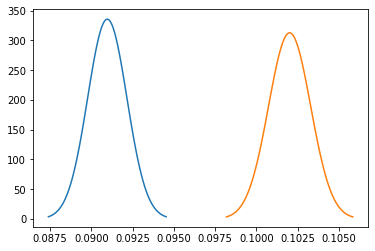

In [513]:
# AK
import matplotlib.pyplot as plt
import scipy.stats

ctrl_cr = 0.090965
test_cr = 0.102005
ctrl_var = 1.411507925080655e-06
test_var = 1.6255542142857143e-06
ctrl_n = 58583
test_n = 56350

# compute the standard deviation (standard error of cr estimate)
ctrl_sd = ctrl_var**0.5
test_sd = test_var**0.5

# create the range of x values
ctrl_x = np.linspace(ctrl_cr - 3 * ctrl_sd, ctrl_cr + 3 * ctrl_sd, 100)
test_x = np.linspace(test_cr - 3 * test_sd, test_cr + 3 * test_sd, 100)

# plot distribution of the CRs for test and control
plt.plot(ctrl_x, scipy.stats.norm.pdf(x = ctrl_x, loc = ctrl_cr, scale = ctrl_sd))
plt.plot(test_x, scipy.stats.norm.pdf(x = test_x, loc = test_cr, scale = test_sd))
plt.show()




Solid Work! We see no overlap, which intuitively implies that our test and control conversion rates are significantly distinct.

## Plotting the difference distribution

Now lets plot the difference distribution of our results that is, the distribution of our lift.

The cont_var and test_var as well as the cont_conv and test_conv have been loaded for you. Additionally the upper and lower confidence interval bounds of this distribution have been provided as lwr_ci and upr_ci respectively.

- Calculate mean of the lift distribution by subtracting the control conversion rate (cont_conv) from the test conversion rate (test_conv)
- Generate the range of x-values for the difference distribution, making it 3 standard deviations wide.
- Plot a normal distribution by specifying the calculated lift_mean and lift_sd.
- Plot a green vertical line at the distributions mean, and a red vertical lines at each of the lower and upper confidence interval bounds. This has been done for you, so hit 'Submit Answer' to see the result!

In [ ]:
# lab

print(f'cont_conv: {cont_conv}')
print(f'test_conv: {test_conv}')
print(f'cont_var: {cont_var}')
print(f'test_var: {test_var}')
print(f'lwr_ci: {lwr_ci}')
print(f'upr_ci: {upr_ci}')
# cont_conv: 0.090965
# test_conv: 0.102005
# cont_var: 1.411507925080655e-06
# test_var: 1.6255542142857143e-06
# lwr_ci: 0.01103999822042502
# upr_ci: 0.011040000177957487

# Find the lift mean and standard deviation
lift_mean = abs(cont_conv - test_conv)
lift_sd = (test_var + cont_var) ** 0.5
print(f'lift_mean: {lift_mean}')
print(f'lift_sd: {lift_sd}')
# lift_mean: 0.011039999999999994
# lift_sd: 0.0017427168844555243

# Generate the range of x-values
lift_line = np.linspace(lift_mean - 3 * lift_sd, lift_mean + 3 * lift_sd, 100)

# Plot the lift distribution
plt.plot(lift_line, norm.pdf(lift_line, lift_mean, lift_sd))

# Add the annotation lines
plt.axvline(x = lift_mean, color = 'green')
plt.axvline(x = lwr_ci, color = 'red')
plt.axvline(x = upr_ci, color = 'red')
plt.show()

delta_mean: 0.011039999999999994
delta_sd: 0.001709518661783446


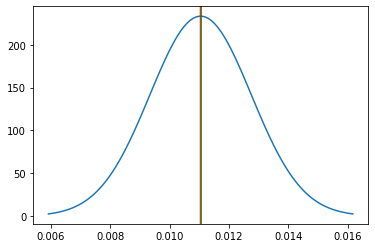

In [524]:
# AK

ctrl_cr = 0.090965
test_cr = 0.102005
ctrl_var = 1.411507925080655e-06
test_var = 1.6255542142857143e-06
ctrl_n = 58583
test_n = 56350
(ci_lower, ci_upper) = get_ci_AK(ctrl_c=ctrl_c, ctrl_n=ctrl_n, test_c=test_c, test_n=test_n, conf_level=0.95)

# find the lift mean and standard deviation
delta_mean = abs(ctrl_cr - test_cr)
p_avg = (ctrl_c + test_c) / (ctrl_n + ctrl_n)
delta_sd = ((p_avg * (1-p_avg) * (1/ctrl_n + 1/ctrl_n))) ** 0.5
print(f'delta_mean: {delta_mean}')
print(f'delta_sd: {delta_sd}')

# generate the range of x-values
delta_x = np.linspace(delta_mean - 3*delta_sd, delta_mean + 3*delta_sd, 100)

# plot the lift distribution
plt.plot(delta_x, scipy.stats.norm.pdf(x = delta_x, loc = delta_mean, scale = delta_sd))
# add the annotation lines
plt.axvline(x = delta_mean, color = 'green')
plt.axvline(x = ci_lower, color = 'red', alpha=0.3)
plt.axvline(x = ci_upper, color = 'red', alpha=0.3)
plt.show()


Amazing work! This really contextualizes the lift we observed and provides more information than reporting the numerical point estimate alone would.

## Randomization of users (from AWS)


In [476]:
# AK
import hashlib

feature = 'home_page_recommender'
experiment_name = 'ab_home_recommendation'
user_id = 'krst7788'
#user_id = 'krst7788_1'
variations = ['variant_1','variant_2']
hash_str = f'experiments.{feature}.{experiment_name}.{user_id}'.encode('ascii')
hash_int = int(hashlib.sha1(hash_str).hexdigest()[:15], 16)
index = hash_int % len(variations)
print(f'hash_str: {hash_str}')
print(f'hash_int: {hash_int}')
print(f'index: {index}')





hash_str: b'experiments.home_page_recommender.ab_home_recommendation.krst7788'
hash_int: 115794222173982586
index: 0


In [533]:
import json
import pprint

with open('/Users/Andrew/Downloads/KDS-S3-ecCDG-1-2022-08-30-15-55-49-9da0f59e-d235-4964-90a4-3ce28120f0a0', 'r') as f:
    result = f.read()
    
pprint.pprint(result)
    


('{"event_type":"View","event_timestamp":1661874943866,"arrival_timestamp":1661874944800,"event_version":"3.1","application":{"app_id":"7d1277cb4e9144e19d4249cf53b890ac","cognito_identity_pool_id":"us-east-1:8531ba9f-1a1f-410d-aca1-4f2a0928c587","sdk":{},"version_name":"Chrome/104.0.0.0"},"client":{"client_id":"b20ee4e0-2862-11ed-94f8-0f3738dc0ab4","cognito_id":"us-east-1:6d34cea7-d5b9-4e57-ac91-5b64bfaffbfc"},"device":{"make":"Gecko","model":"Chrome","platform":{"name":"macintel"}},"session":{"session_id":"285aabc4-287c-11ed-94f8-0f3738dc0ab4","start_timestamp":1661874923644},"attributes":{"image":"http://d2dqg31qmn6qjz.cloudfront.net/images/floral/5d926c34-3aca-40c3-9199-603c6717ea37.jpg","productId":"5d926c34-3aca-40c3-9199-603c6717ea37","feature":"category_detail_rank","name":"Indoor '
 'Plant","category":"floral","userId":"3748"},"metrics":{"price":129.990000000000009094947017729282379150390625},"endpoint":{"ChannelType":"EMAIL","Address":"andrew.kristov@gmail.com","EndpointStatus